---

<h1 style="text-align: center;font-size: 30px;">Exploratory Data Analysis</h1>

---

<center><img style="width: 700px;" src="https://www.researchify.co.uk/generator/data.gif"></center>

---
<i>image from Google</i>

# Exploratory Data Analysis (EDA)

<p>There was an a quotes of Epictetus, something like that</p>
<h3>Know, first, Who you are, and then adorn yourself accordingly.
~ Epictetus
 </h3>
<p>Exploratory Data Analysis (EDA) something like that, know your data first and do feature engineering accordingly. To knowing your data in data science, its called Exploratory Data Analysis in short EDA.</p>
<p> So basically Exploratory Data Analysis is the examination of data and find out relationships among variables through both numerical and graphical methods.  EDA is a task of analyze data, investigate data to the way we find out patterns, relationship, outliers and distribution of data. It is one of the most important task for data scientist to do data science task. </p>
<p> Doing EDA is good practice to know the data first. And find out inside information, relations as much as posible</p>
<p> To starting data science task normally we start it with EDA. So solving 
<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">House Prices: Advanced Regression Techniques</a> we starting it with here. This is <b> part-1 </b> of this problem.</p>
<p>Other part of this solution for Feature Engineering & Prediction, You find it here.</p>
<a href="https://www.kaggle.com/snanilim/feature-engineering-prediction-house-prices">Feature Engineering & Prediction - House Prices</a>

# Steps of EDA:
<ol>
    <li>Basic Analysis with Pandas
        <ol>
            <li> Descriptive analysis </li>
        </ol>
    </li>
    <li>Missing Values</li>
    <li>Features Classification
        <ol>
            <li>Numerical Features</li>
            <li>Categorical Features</li>
        </ol>
    </li>
    <li>Univariate Analysis
        <ol>
            <li>Analyze Date Time Columns</li>
            <li>Univariate Analysis of Numerical Features</li>
        </ol>
    </li>
    <li>Bivariate analysis
        <ol>
            <li>Bivariate analysis of Numerical Features</li>
            <li>Bivariate analysis of Categorical Features</li>
        </ol>
     </li>
    <li>Correlation coefficients</li>
    <li>Outliers</li>
    <li>Central tendency and distribution of target columns</li>
</ol>

# Goals of EDA
<ol>
    <li>Find out patterns</li>
    <li>Find out Relationship among variables</li>
    <li>Find out Anomalies</li>
    <li>Check Assumptions</li>
    <li>Frame Hypothesis</li>
</ol>

---

<h3 style="text-align: center;font-size: 20px;">In data science process, you can see where is EDA.</h3>

---

<center><img style="width: 700px;" src="https://blog.camelot-group.com/wp-content/uploads/2019/03/Picture2.png"></center>

---
<i>image from Google</i>

## Import necessary libraries and files

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


To starts with,I import necessary libraries (which i done in above cell) and loaded the data set with pandas "read_csv" method.

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

Just load the train dataset. We have no plans for a test dataset here.

# 1. Basic Analysis with Pandas

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


With help of “ .head()” method of pandas library which returns first five observations of the data set.Similarly “.tail()” returns last five observations of the data set.

for total number of rows and columns we use pandas ".shape()" method.

In [4]:
train_data.shape

(1460, 81)

* So our Dataset contains 1460 rows and 81 columns 

At first i want to drop "Id" column. which is unnecessary for me now

In [5]:
train_data = train_data.drop(columns=['Id'])

In [6]:
total_rows = train_data.shape[0]
total_columns = train_data.shape[1]
print('Total rows', total_rows)
print('Total columns', total_columns)

Total rows 1460
Total columns 80


now i have 1460 rows and 80 columns

Now let's try printing out column names using columns:

In [7]:
all_columns = train_data.columns
all_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Here we see our all columns name with the respect of our target column "SalePrice". its help us to operate some loop and copy paste columns name 😁

<p>Few key insights just by looking at dependent variable are as follows:</p>
<p>Now we want to see top 5 and lowest 5 saleprices. basically its has no direct benefit but we want to see those to know whats are top and lowest prices on this place.</p>

top 5

In [8]:
train_data['SalePrice'].sort_values(ascending=False).head()

691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64

lowesst 5

In [9]:
train_data['SalePrice'].sort_values(ascending=True).head()

495    34900
916    35311
968    37900
533    39300
30     40000
Name: SalePrice, dtype: int64

In [10]:
len(train_data['SalePrice'].unique())

663

In [11]:
train_data['SalePrice'].value_counts().head(20)

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
Name: SalePrice, dtype: int64

* Our target column or dependent column is continuous numerical in nature
* top 20 repeated or most saling, "salePrice". if u have 130000 to 160000 u have most chance to buy a house

We can use the info() method to output some general information about the dataframe:

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Observation:

* Alley, PoolQC, Fence, MiscFeature features contain a number of null values in that order for the training dataset. and all are categorical columns

* 38 features are of float and int type and 43 features are type of object



## 1.1 Descriptive analysis

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [13]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Here you can notice the maximum case mean value is greater than the median value of each column which is represented by 50%(50th percentile) in the index column.
* Some are weird also like "MasVnrArea" mean is 103.685262 but median is 0.00000
* There is notably a large difference between 75th %tile and max values of predictors “MSSubClass”,”LotArea”,”MasVnrArea” so on.
* Thus observations suggests that there are extreme values-Outliers in our data set.
* One important thing is that in salePrice our minimum price is larger than zero. We don't have one of those personal traits that would destroy our model.
* and other things is that all most all int columns have value

In [14]:
train_data.describe(include=['object', 'bool'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


* there lots of columns have null value
* we can see the unique row. from this we can get some basic idea about categorical columns 

In [15]:
print(train_data['SalePrice'].mean())
print('-' * 20)
print(train_data['SalePrice'].median())
print('-' * 20)
print('Difference between mean and median', train_data['SalePrice'].mean() - train_data['SalePrice'].median())

180921.19589041095
--------------------
163000.0
--------------------
Difference between mean and median 17921.19589041095


Estimate Skewness and Kurtosis

In [16]:
train_data.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

* A skewness value of 0 in the output denotes a symmetrical distribution.
* Normal skewness (mean = median = mode)
* A negative skewness value in the output indicates an asymmetry and the tail will be larger towards the left hand side of the distribution.
* Negative skewness (mean < median < mode)
* A positive skewness value in the output indicates an asymmetry and the tail will be larger towards the right hand side of the distribution.
* Positive skewness (mode < median < mean)

In [17]:
train_data.kurt()

MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1

* A normal distribution is called mesokurtic and has kurtosis of or around zero
* Mesokurtic [normal] k = 0
* A platykurtic distribution has negative kurtosis and tails are very thin compared to the normal distribution.
* platykurtic [negative] k < 0
* Leptokurtic distributions have kurtosis greater than 3 and the fat tails mean that the distribution produces more extreme values and that it has a relatively small standard deviation
* Leptokurtic [positive] k > 0



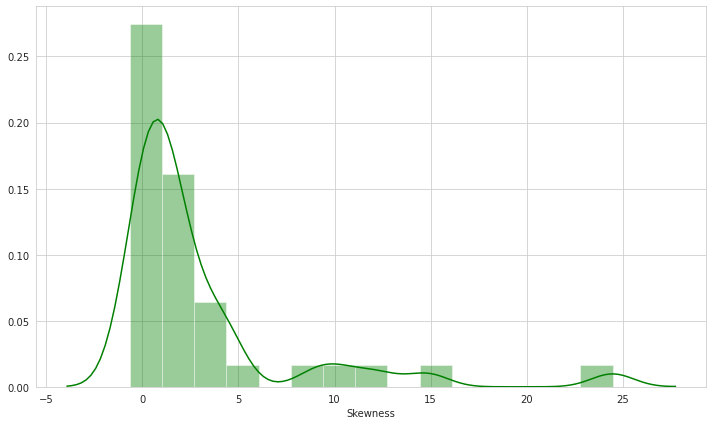

In [18]:
plt.figure(figsize=(12, 7))
sns.distplot(train_data.skew(),color='green',axlabel ='Skewness')
plt.show()

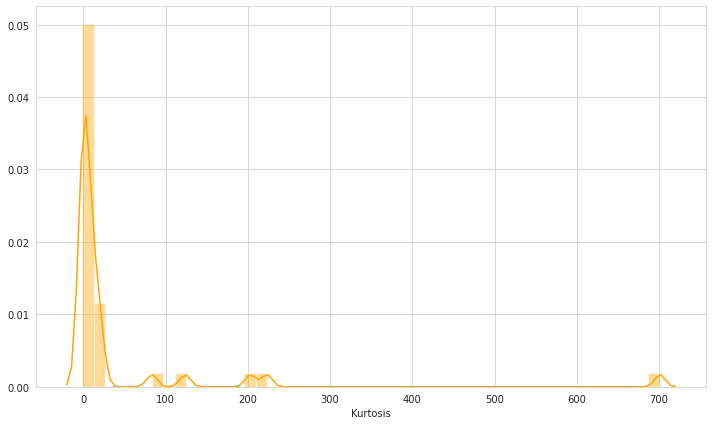

In [19]:
plt.figure(figsize=(12, 7))
sns.distplot(train_data.kurt(),color='orange',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

# 2. Missing Values

Missing value of each columns

In [20]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = ((train_data.isnull().sum() / total_rows) * 100).sort_values(ascending=False)
null_data = pd.concat([total, percent], axis=1,join='outer', keys=['Null count', 'Percentage %'])
null_data.index.name ='Columns'
null_data = null_data[null_data['Null count'] > 0].reset_index()
null_data

,Columns,Null count,Percentage %
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageType,81,5.547945
7,GarageCond,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


<p>here we can see our all null columns and their null amount and percentage. top 5 null columns are </p>
<ul>
<li> PoolQC </li>
<li> MiscFeature </li>
<li> Alley </li>
<li> Fence </li>
<li> FireplaceQu </li>
</ul>

**We'll consider that when more than 20% to 30% of the data is missing, we should delete the corresponding variable and pretend it never existed. but we will do it in feature engineering part.**

**Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers**

In [21]:
null_columns = null_data['Columns']
null_columns

0           PoolQC
1      MiscFeature
2            Alley
3            Fence
4      FireplaceQu
5      LotFrontage
6       GarageType
7       GarageCond
8     GarageFinish
9       GarageQual
10     GarageYrBlt
11    BsmtFinType2
12    BsmtExposure
13        BsmtQual
14        BsmtCond
15    BsmtFinType1
16      MasVnrArea
17      MasVnrType
18      Electrical
Name: Columns, dtype: object

Missing value of each rows

In [22]:
null_rows = train_data.isnull().sum(axis=1).sort_values(ascending=False).head(20)
# null_rows = null_rows.head(20)
null_rows

1011    15
533     15
1218    15
39      15
705     14
1179    14
520     14
375     11
1035    11
1143    11
1030    11
287     11
1321    11
342     11
613     10
108     10
125     10
210     10
1219    10
1407    10
dtype: int64

In [23]:
null_rows.index

Int64Index([1011,  533, 1218,   39,  705, 1179,  520,  375, 1035, 1143, 1030,
             287, 1321,  342,  613,  108,  125,  210, 1219, 1407],
           dtype='int64')

Missing value of each rows percentage

In [24]:
((null_rows *100) / 80)

1011    18.75
533     18.75
1218    18.75
39      18.75
705     17.50
1179    17.50
520     17.50
375     13.75
1035    13.75
1143    13.75
1030    13.75
287     13.75
1321    13.75
342     13.75
613     12.50
108     12.50
125     12.50
210     12.50
1219    12.50
1407    12.50
dtype: float64

they shown us of top 20 missing values rows and their percentages

In [25]:
train_data.loc[null_rows.index].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1011,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,SBrkr,1664,0,0,1664,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
533,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
1218,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,N,SBrkr,672,240,0,912,0,0,1,0,2,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,80500
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
705,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,SBrkr,372,720,0,1092,0,0,2,0,3,2,Fa,7,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000


almost 18% of all those rows don't have values.

now we can do some plotting with those null value

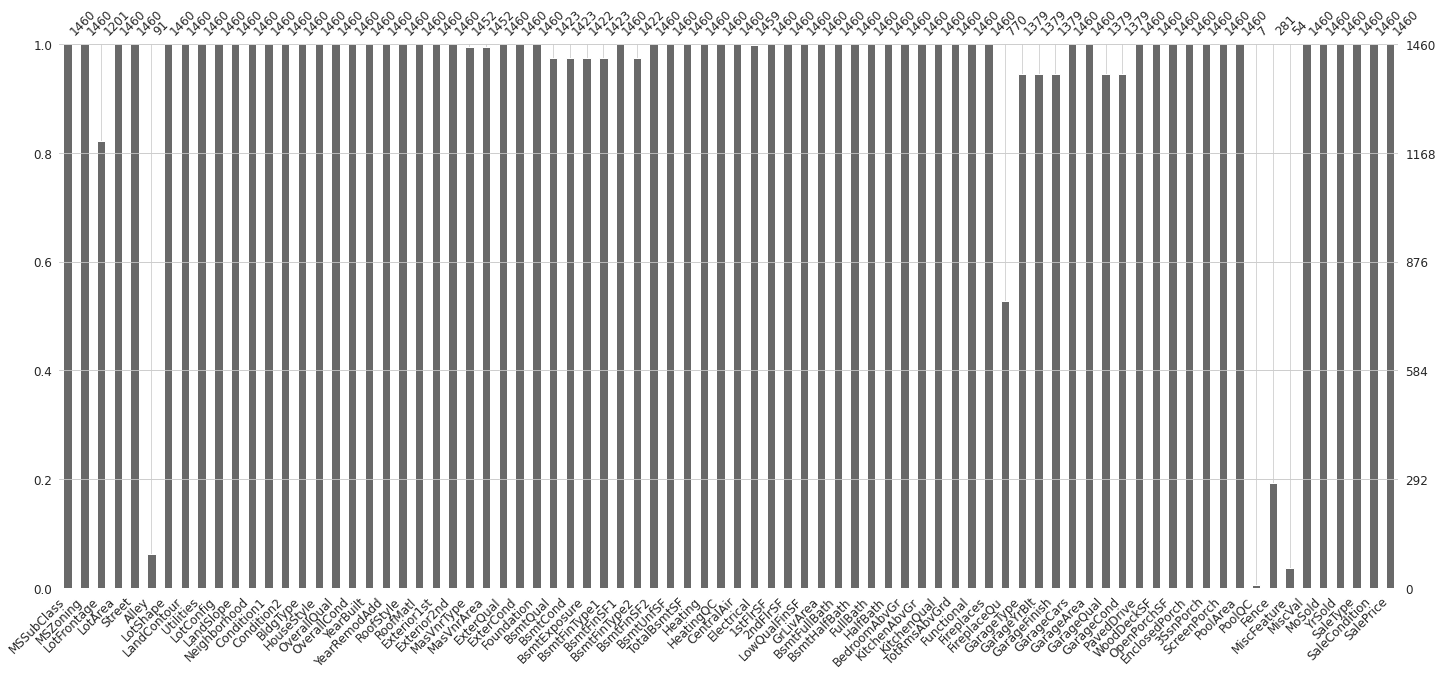

In [26]:
# msno.bar.__code__.co_varnames
msno.bar(train_data.sample(1460), labels=True, fontsize=12)

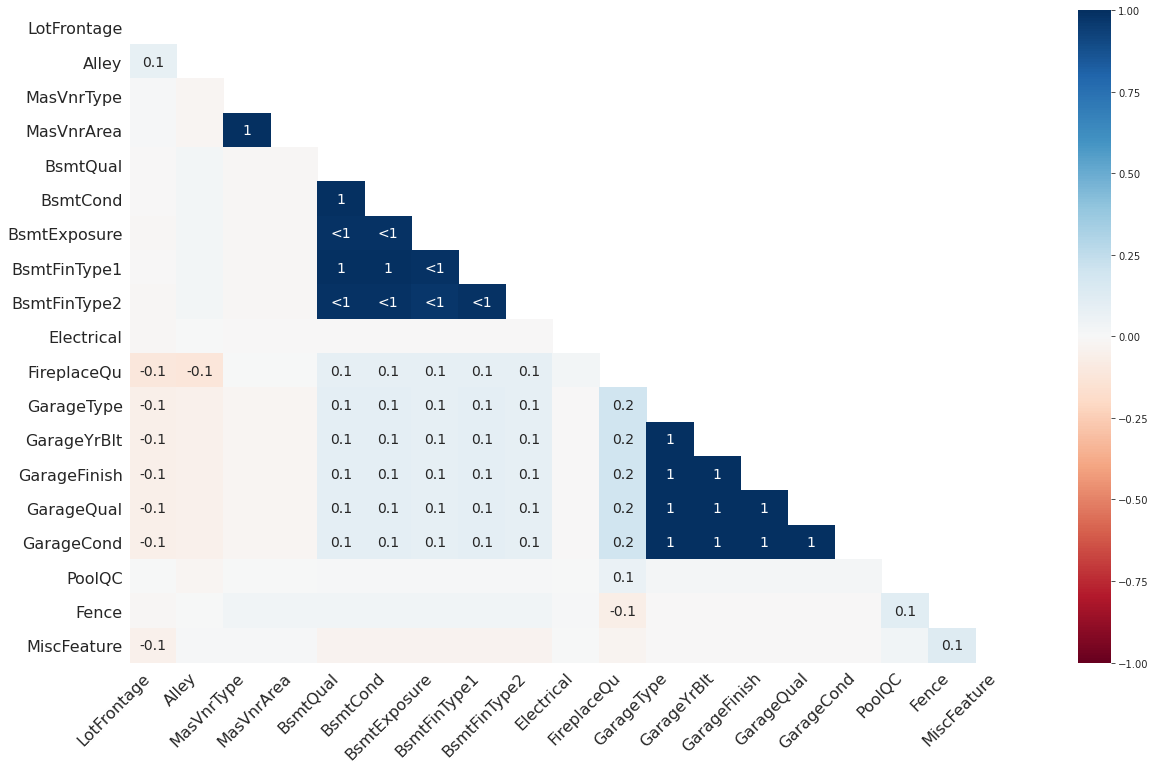

In [27]:
msno.heatmap(train_data)

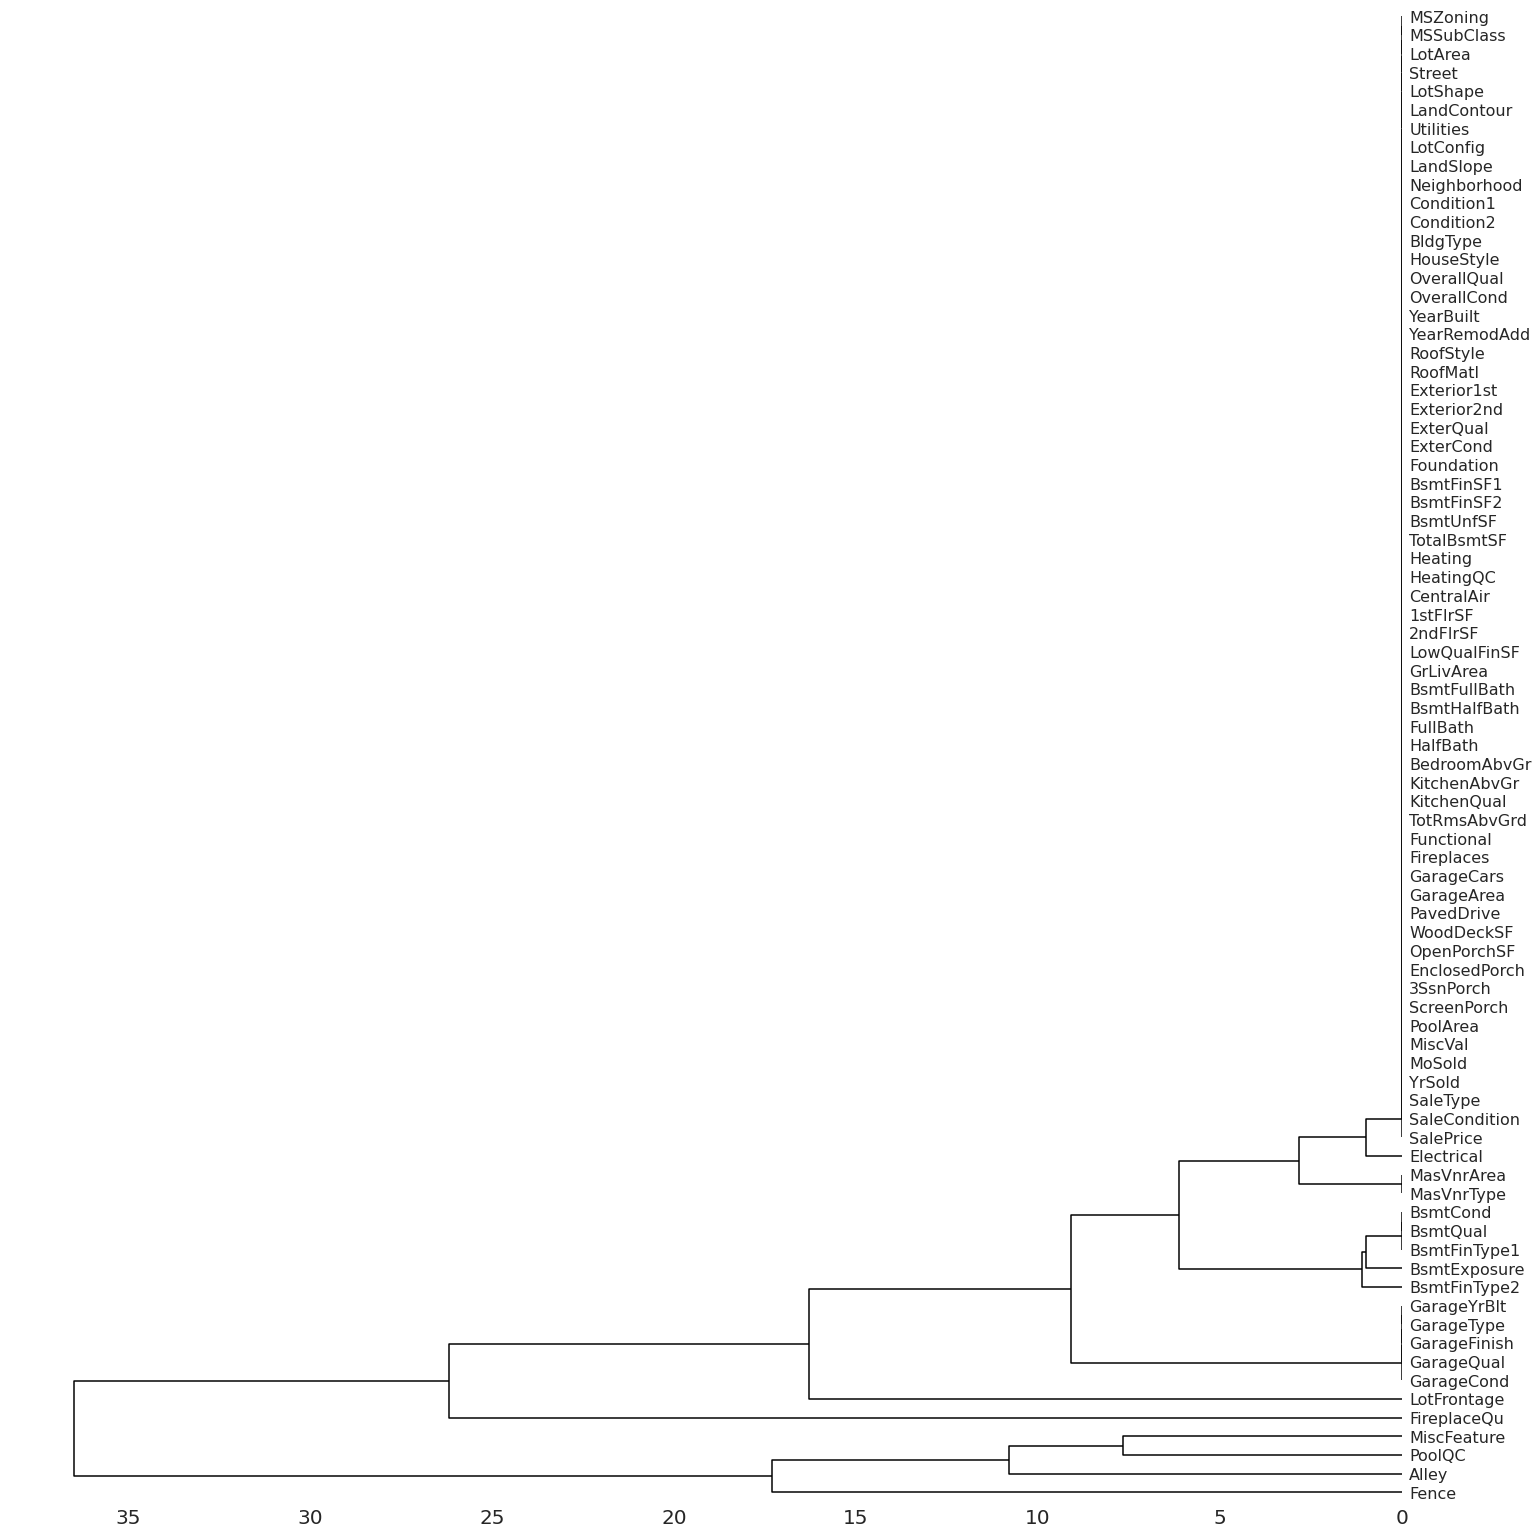

In [28]:
msno.dendrogram(train_data)

missingno is a awesome library for showing missing value. with the help of dendrogram, heatmap and bar chat you can plot missing value very well.

In [29]:
copy_data = train_data.copy()

we see that we have lots of null values. we want to know that how much effect they have in our target column "salePrice"

we will convert or map our null value into 1 and have value into 0

**This plot list is little bit longer if u want to see those please click "Show" button****

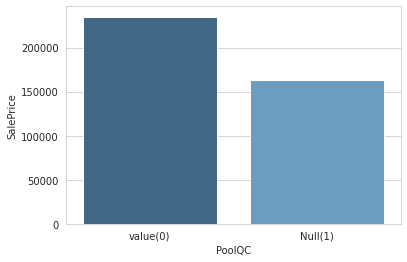

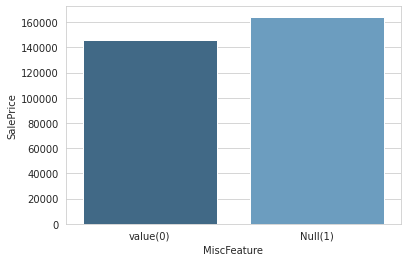

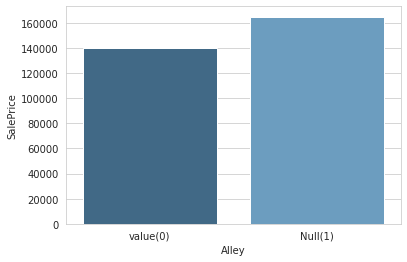

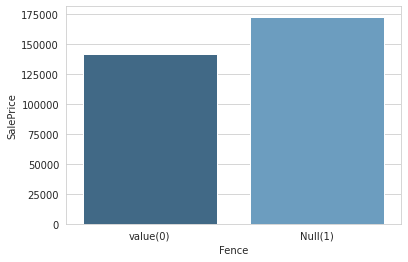

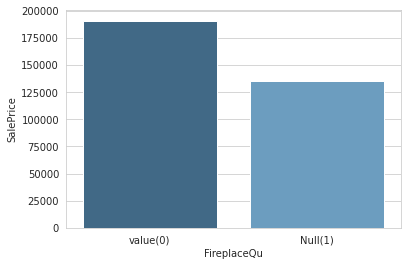

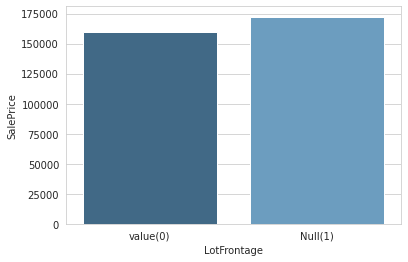

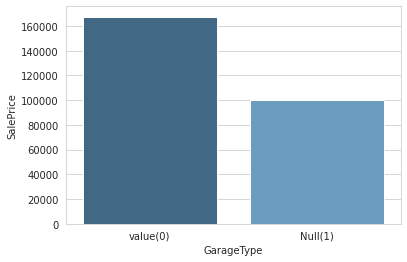

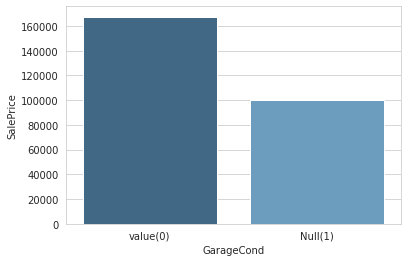

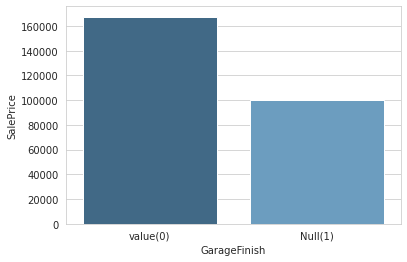

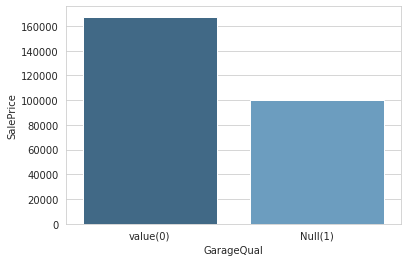

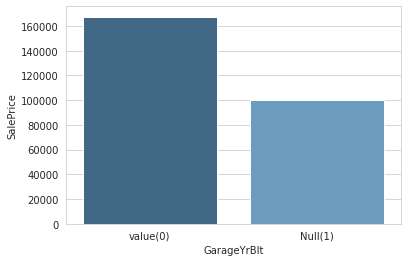

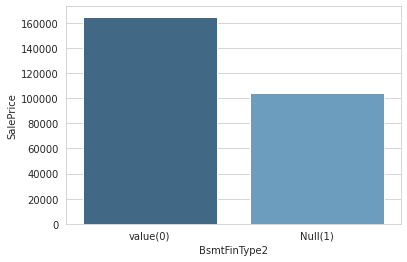

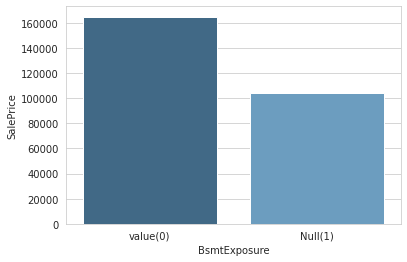

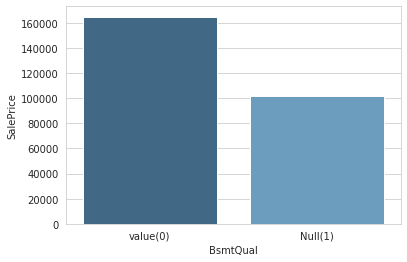

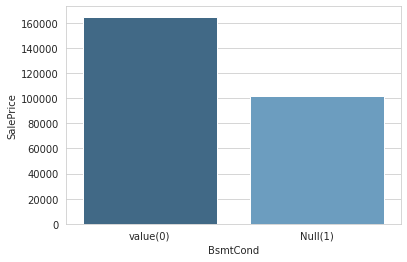

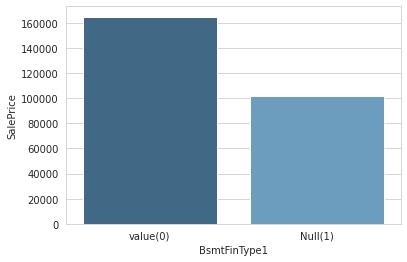

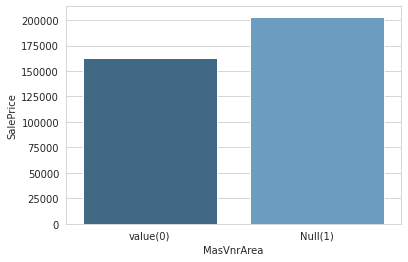

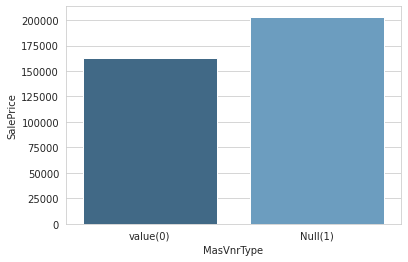

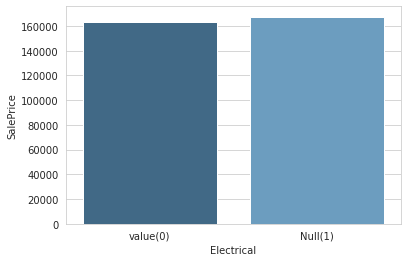

In [30]:
for column in null_columns:
    copy_data[column] = np.where(train_data[column].isnull(), 1, 0)
    
    plot_data = copy_data.groupby(by=[column])['SalePrice'].median()
    plot_data = pd.DataFrame(plot_data)
    plot_data = plot_data.reset_index()
    sns.barplot(x=plot_data[column], y=plot_data['SalePrice'], data=plot_data, palette="Blues_d")
    
    plt.xticks(plot_data[column], ('value(0)', 'Null(1)'))
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

see some null value have effect on our target column sale prices

in code there was an a shortcut but want to use xtricks thats why i code like this. if u know shortcut way to present it let me know in comments

# 3. Features Classification

## 3.1. Numerical Features

In [31]:
numerical_data = train_data.select_dtypes(include=[np.number])
numerical_columns = numerical_data.columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

though 'OverallQual' is not numeric feature but we keep it here to see some relation and plotting

In [32]:
discrete_column = []
continious_column = []
year_column = []

In [33]:
for column in numerical_columns:
    if 'Year' in column or 'Yr' in column:
#         print(column)
        year_column.append(column)

In [34]:
for column in numerical_columns:
    if column != 'SalePrice' and column not in year_column:
        if len(train_data[column].unique()) < 25:
            discrete_column.append(column)
        else:
            continious_column.append(column)

In [35]:
discrete_column

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [36]:
continious_column

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

its little bit hard to find out discrete and continuous columns when u don't know much about your all data. that's why i do this kind of things

## 3.2. Categorical Features

In [37]:
categorical_data = train_data.select_dtypes(include=[np.object])
categorical_columns = categorical_data.columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# 4. Univariate analysis

Univariate visualization — provides summary statistics for each field in the raw data set

## 4.1 Analyze Date Time Columns

first we trying to find out date time variable and then trying to plotting them and analyzing them

In [38]:
year_column = []

In [39]:
for column in numerical_columns:
    if 'Year' in column or 'Yr' in column:
#         print(column)
        year_column.append(column)

In [40]:
train_data[year_column]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


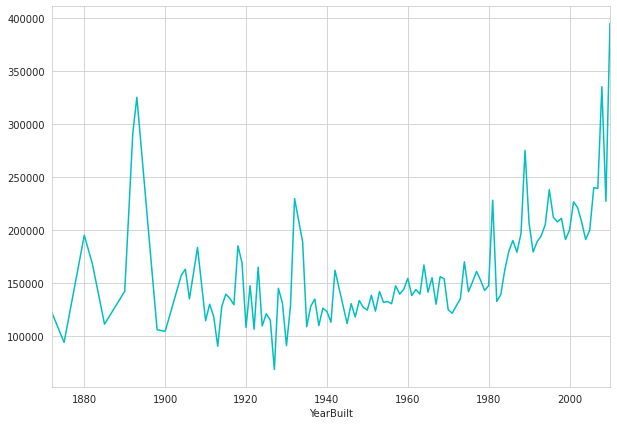

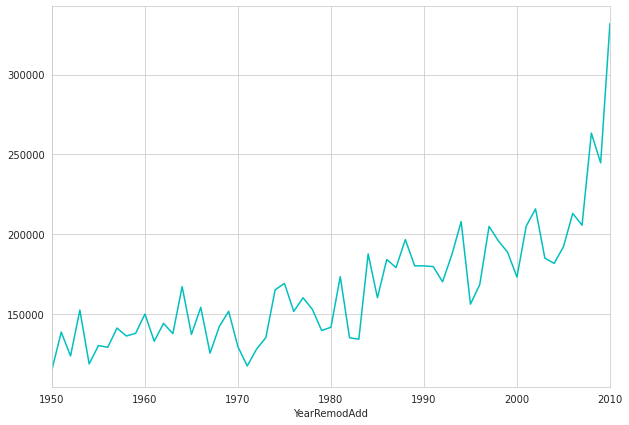

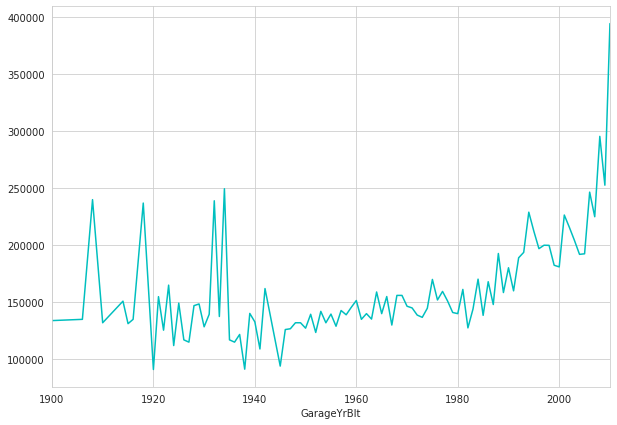

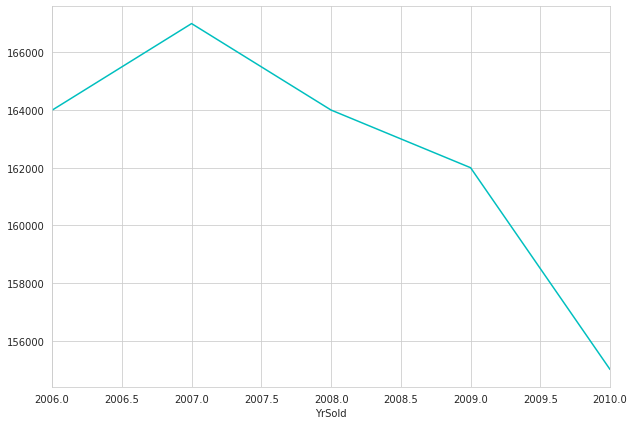

In [41]:
for column in year_column:
    plt.figure(figsize=(10, 7))
    train_data.groupby(by=[column])['SalePrice'].median().plot(color = ['c', 'y'])
    plt.show()

* YearBuilt YearRemodAdd GarageYrBlt sown us when year is increasing price is also increasing
* but in YrSold we see something different we need to find out why

In [42]:
year_data = train_data.copy()

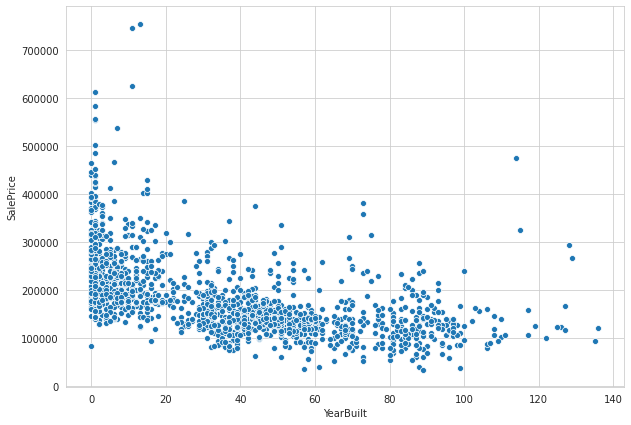

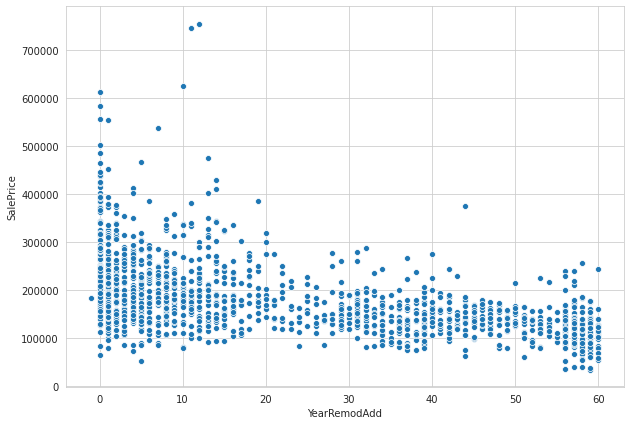

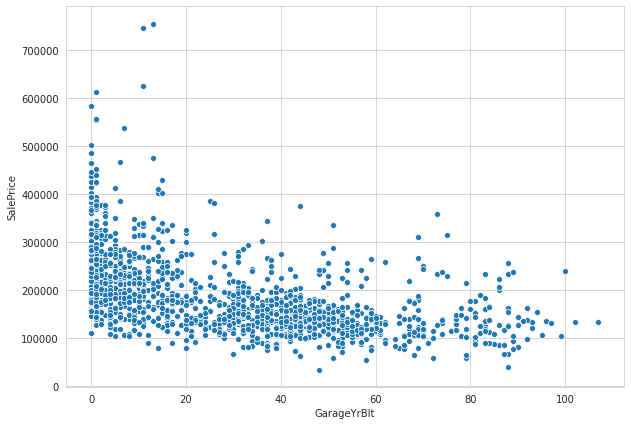

In [43]:

for column in year_column:
    if column != 'YrSold':
        plt.figure(figsize=(10, 7))
        year_data[column] = year_data['YrSold']-year_data[column]
        
        sns.scatterplot(x=year_data[column], y=year_data['SalePrice'], data=year_data)
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

now we can see its looks ok coz when a house is 140 years old that has less price and we see it in other features also

## 4.2 Univariate Analysis of Numerical Columns

**This plot list is little bit longer if u want to see those please click "Show" button****

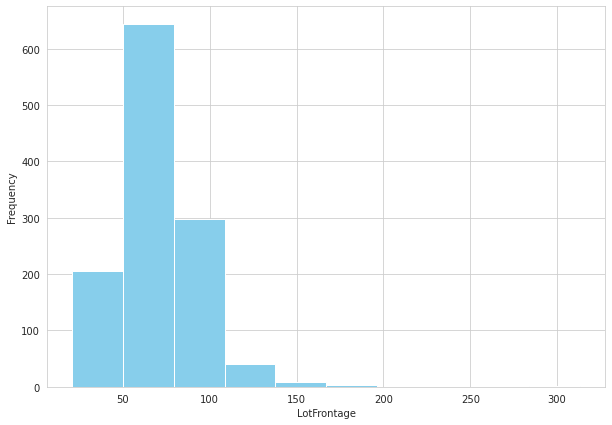

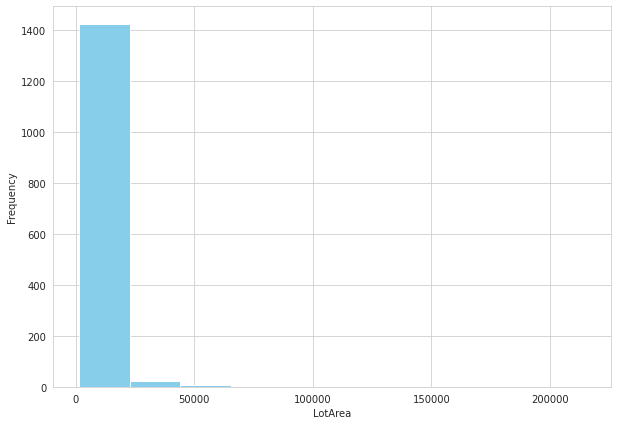

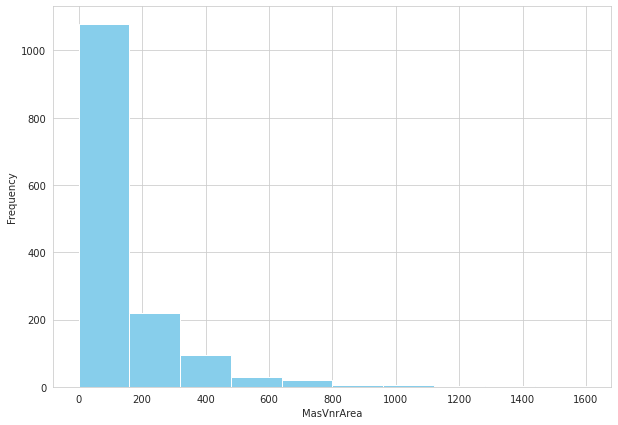

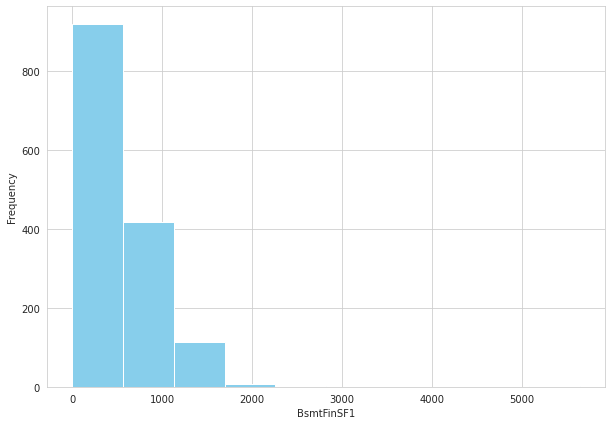

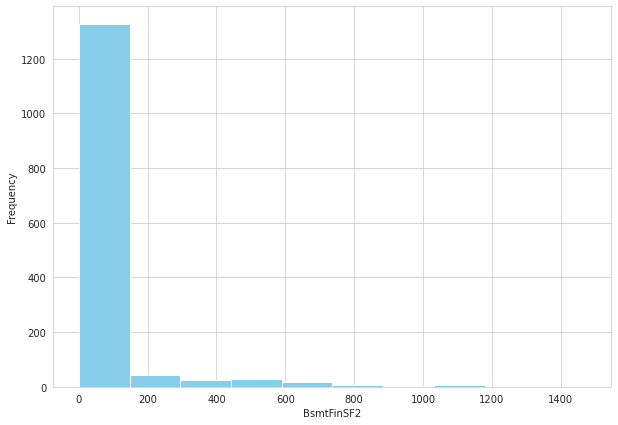

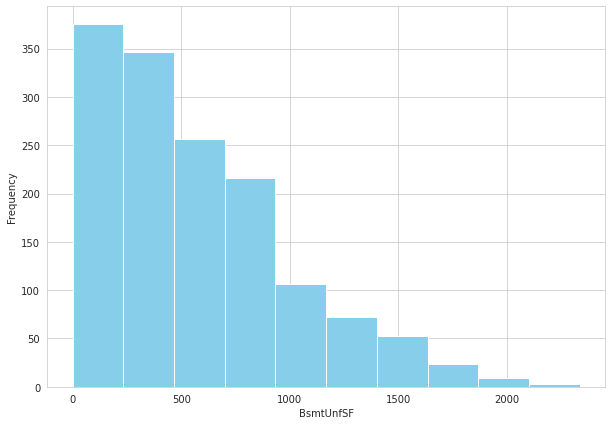

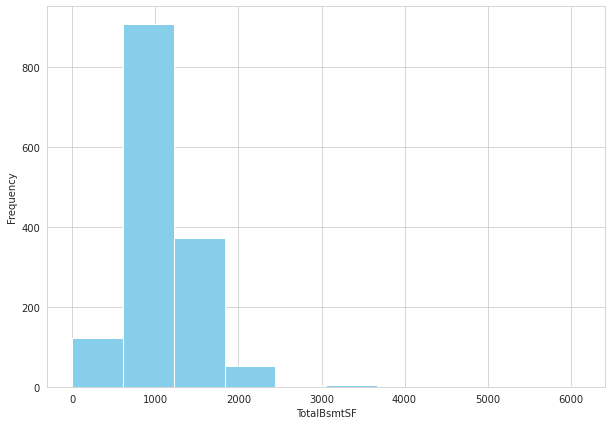

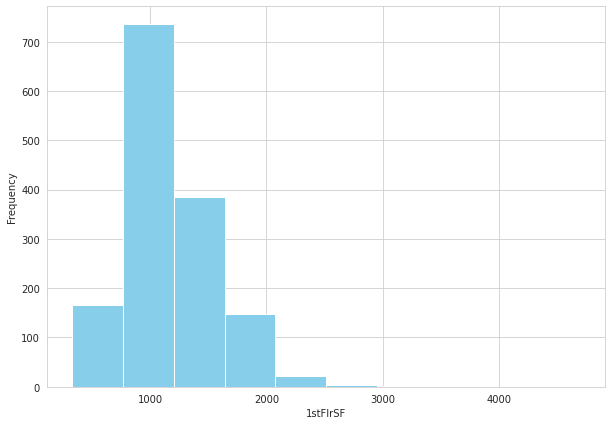

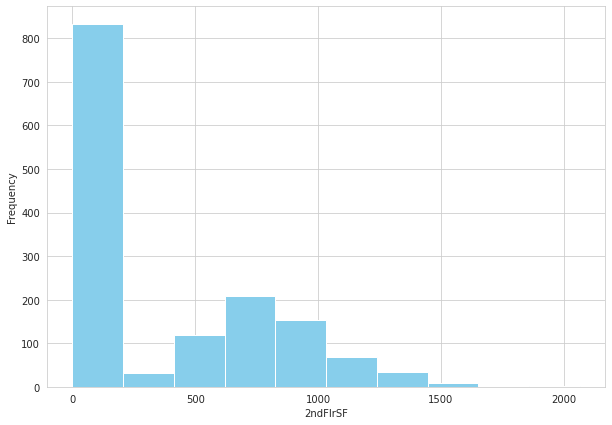

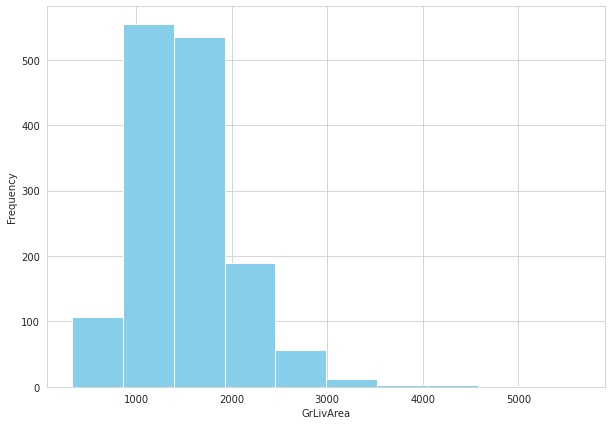

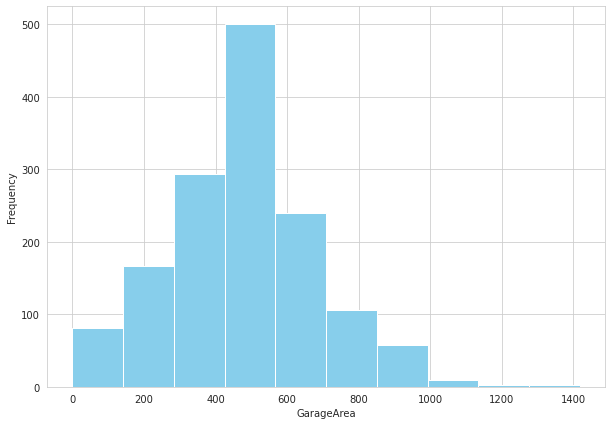

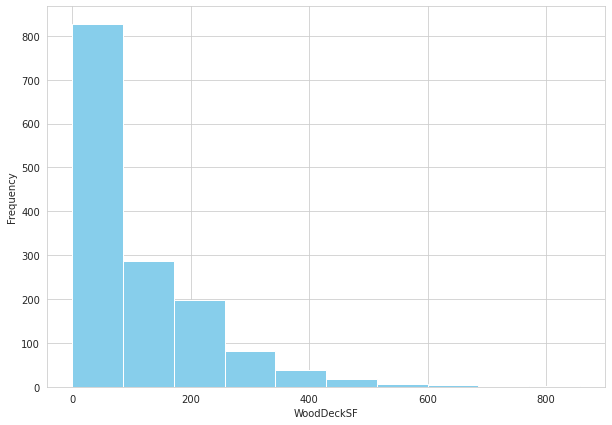

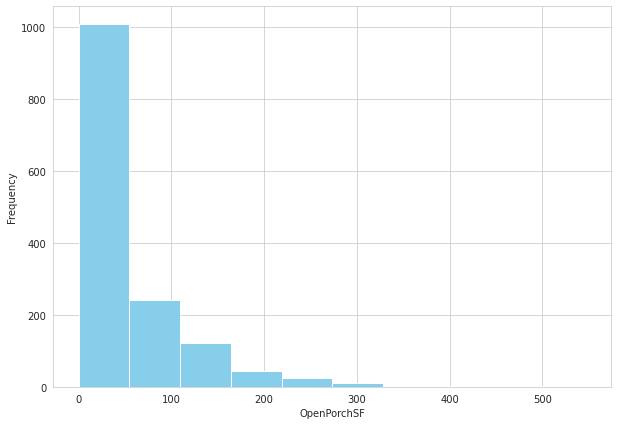

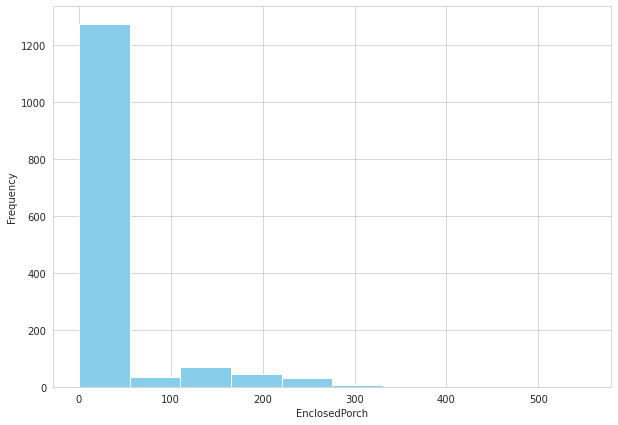

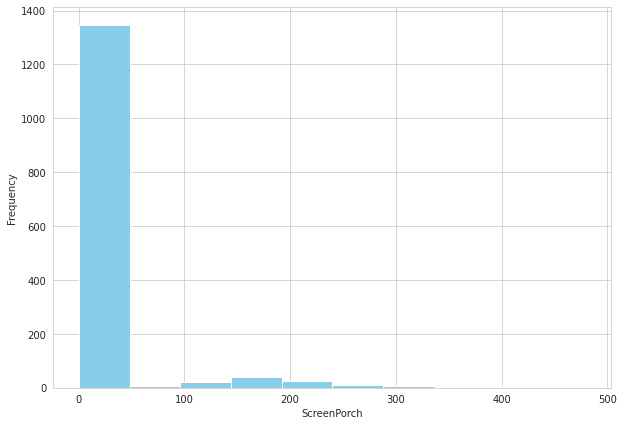

In [44]:
for column in continious_column:
    plt.figure(figsize=(10, 7))
    train_data[column].plot.hist(color = "skyblue")
    plt.xlabel(column)
    plt.show()

we can see our continuous variable is not well distributed. let's do something on this

##### For this Using logarithm transformation

In [45]:
copy_data = train_data.copy()

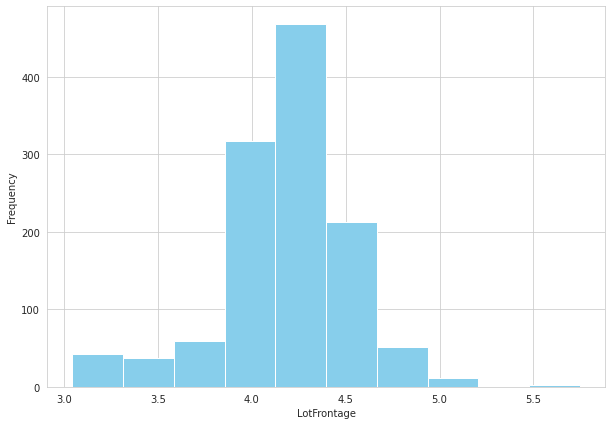

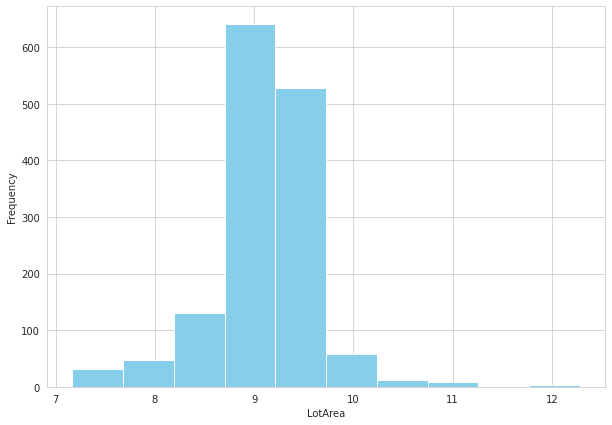

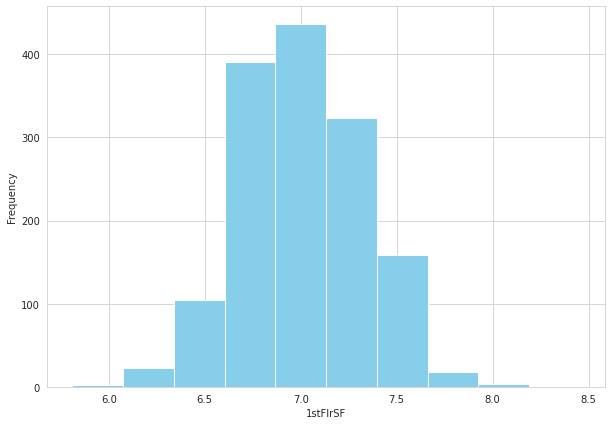

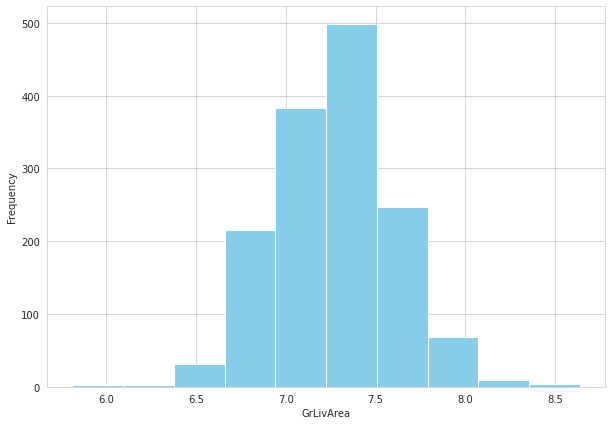

In [46]:
for column in continious_column:
    if 0 in copy_data[column].unique():
        pass
    else:
#         print(column)
        plt.figure(figsize=(10, 7))
        con_data = np.log(copy_data[column])
        con_data.plot.hist(color = "skyblue")
        plt.xlabel(column)
        plt.show()

now we can see have some distribution


# 5. Bivariate analysis

we can also say it **Bivariate visualization**. Bivariate visualization — is performed to find the relationship between each variable in the dataset and the target variable of interest

## 5.2 Bivariate analysis of Numerical Columns

**This plot list is little bit longer if u want to see those please click "Show" button****

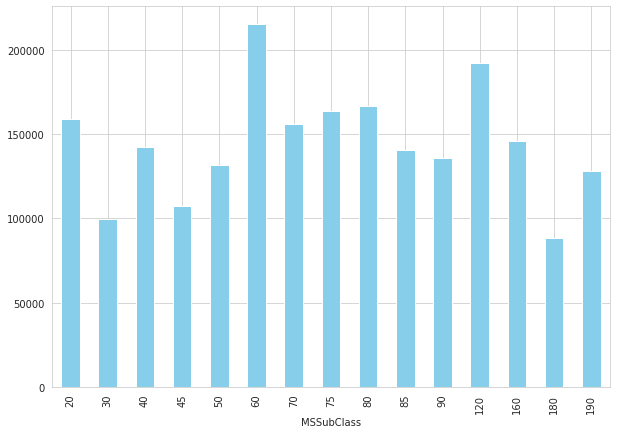

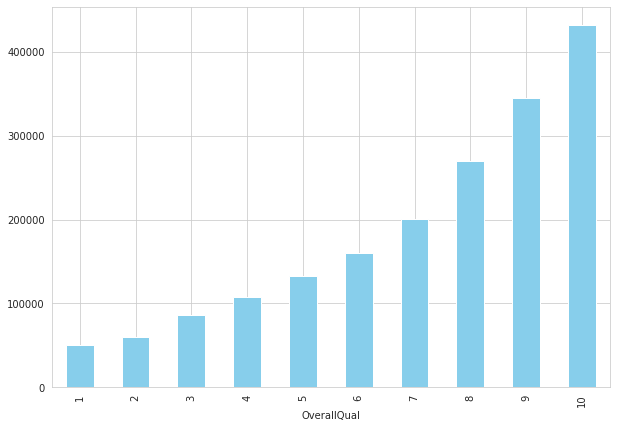

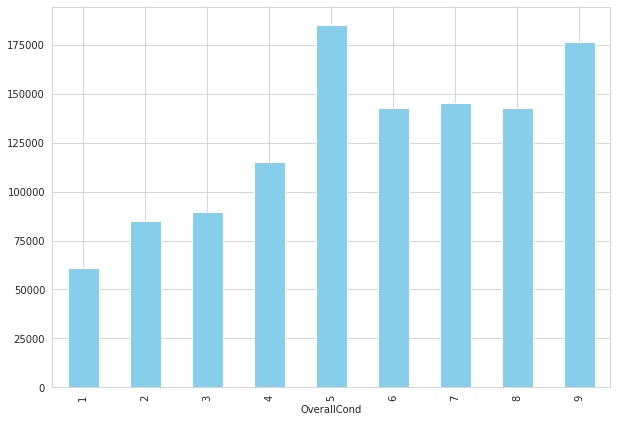

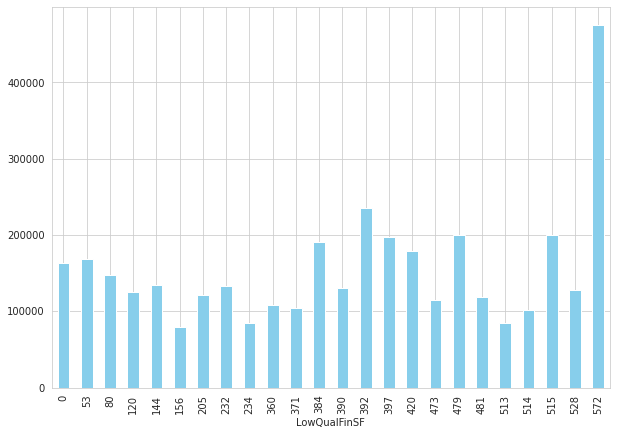

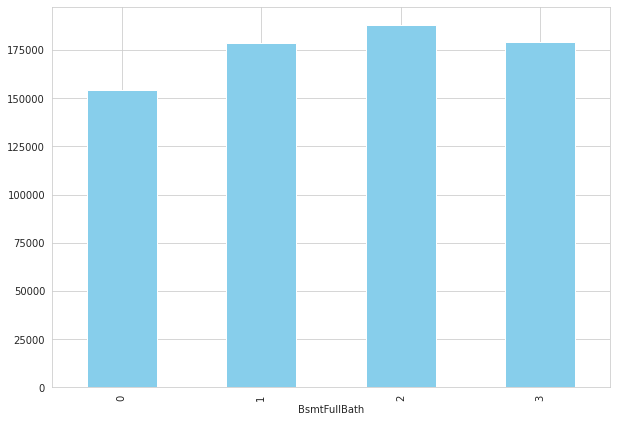

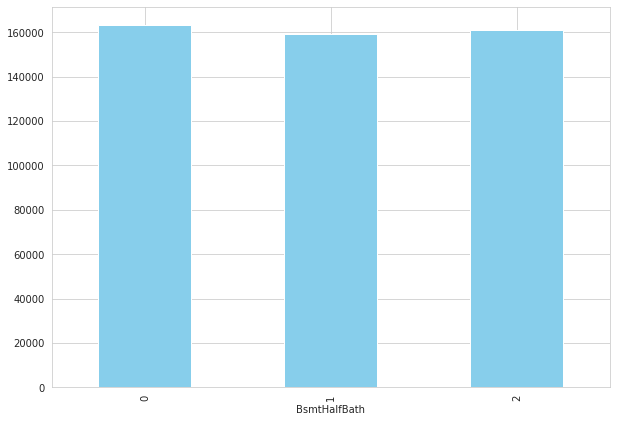

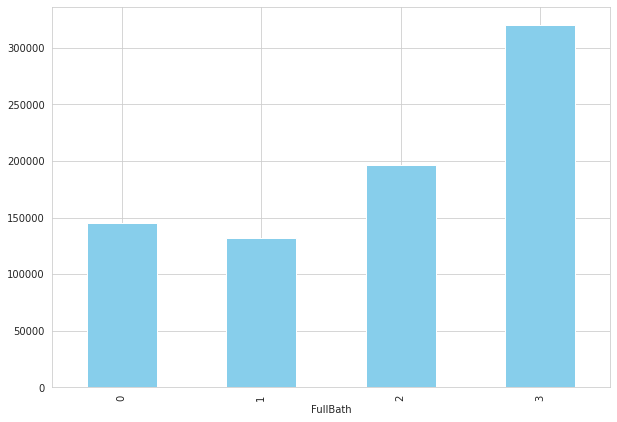

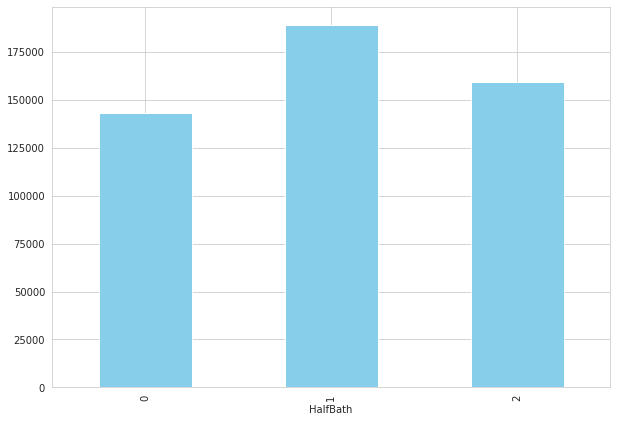

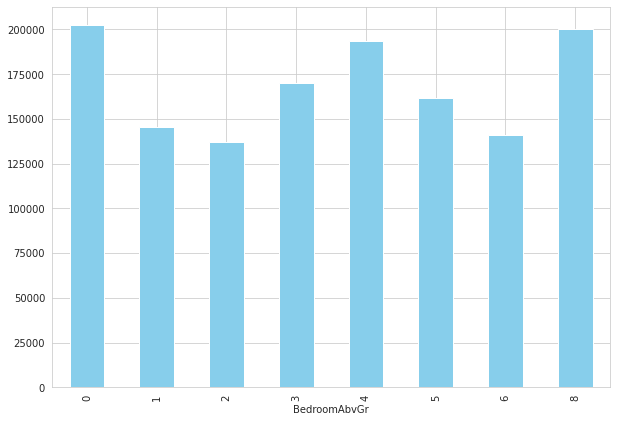

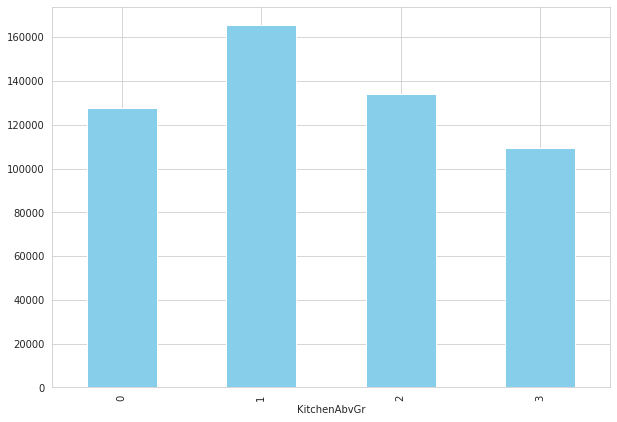

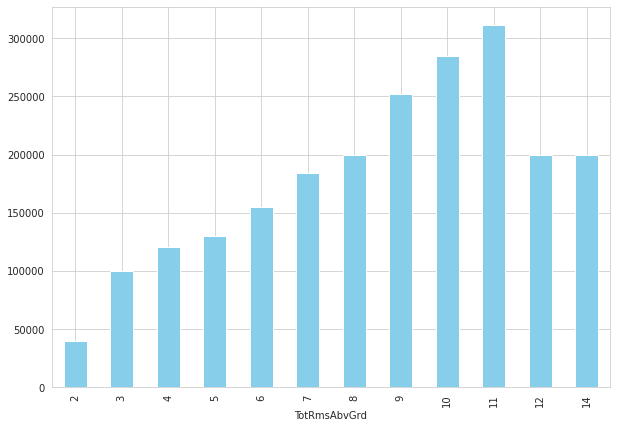

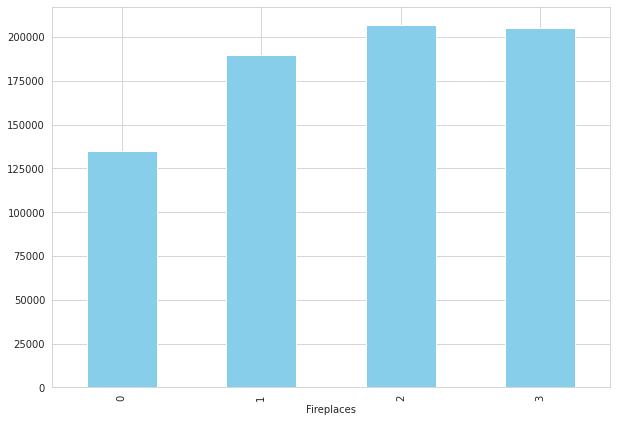

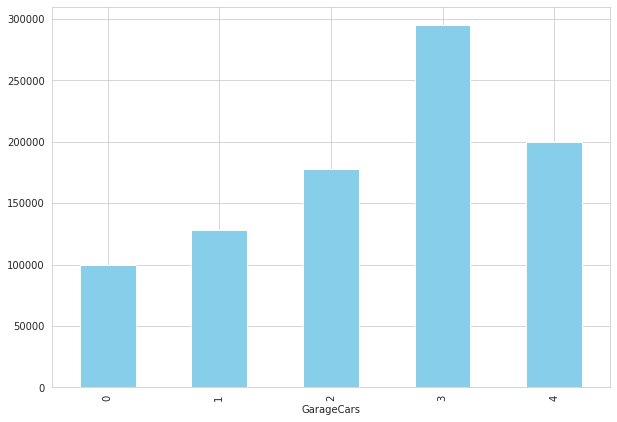

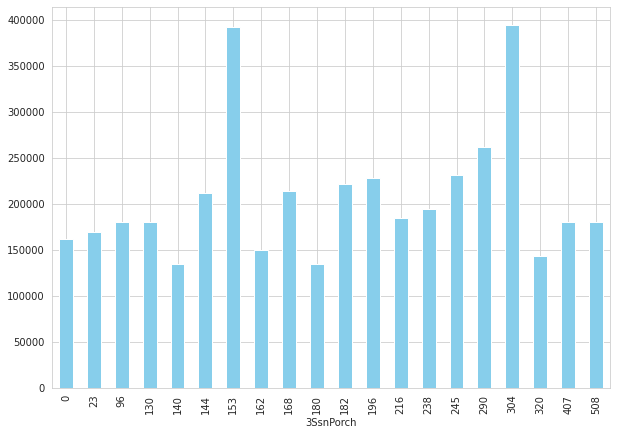

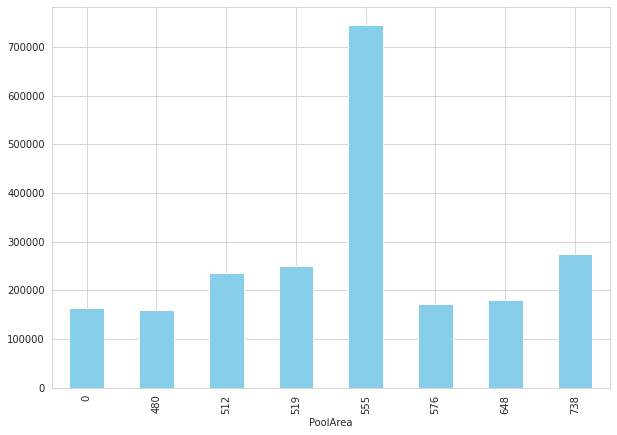

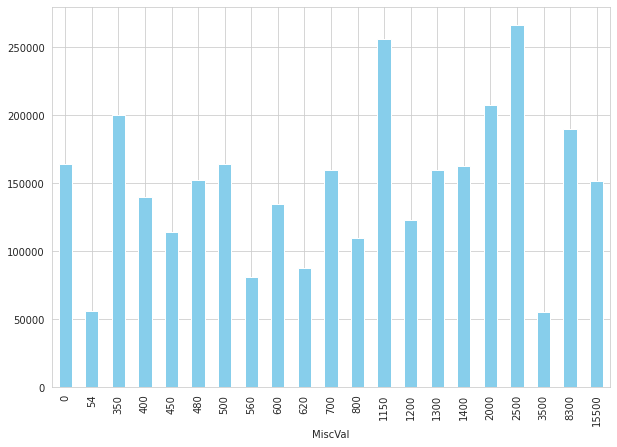

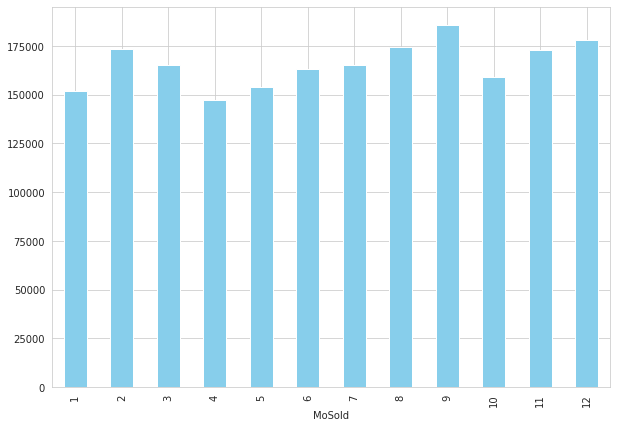

In [47]:
for column in discrete_column:
    plt.figure(figsize=(10, 7))
    train_data.groupby(by=[column])['SalePrice'].median().plot.bar(color = "skyblue")
    
    plt.show()

its told us that **OverallQual** have good relation with sale price, when quality increases sale price exponentially increases. and also have some good relation in FullBath, TotRMSAdvGrd, GarageCars with sale price as well

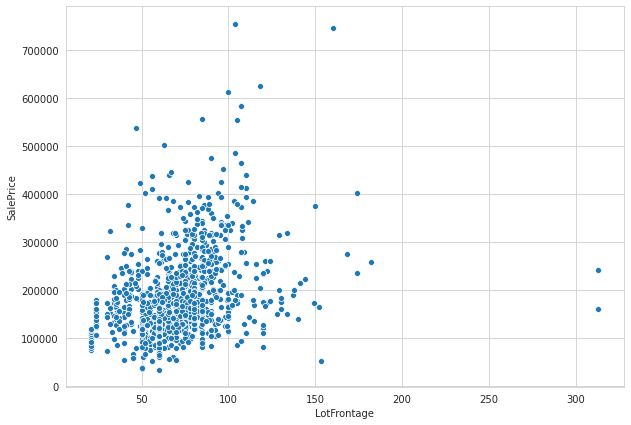

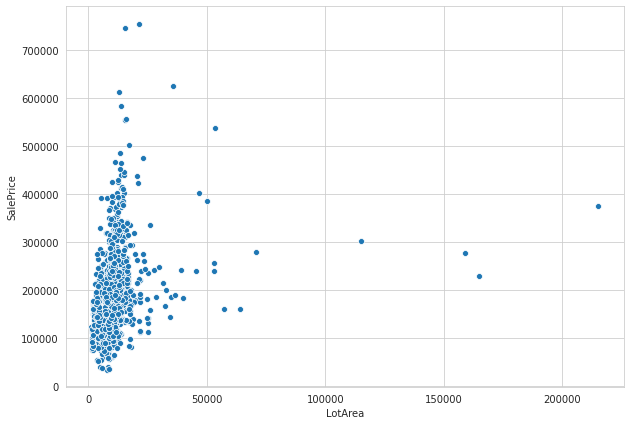

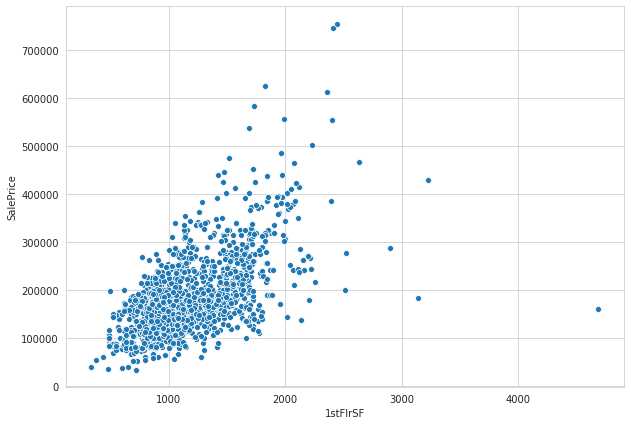

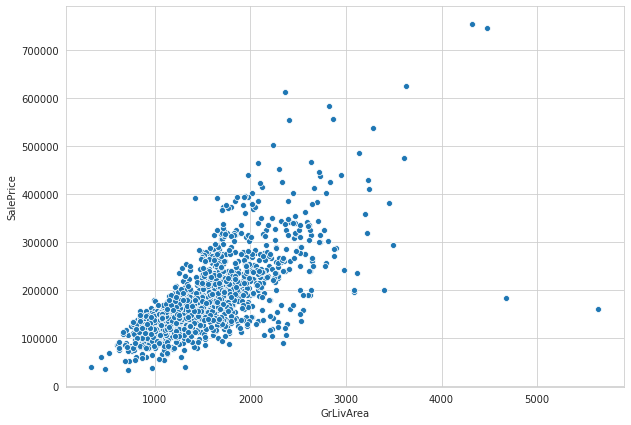

In [48]:
for column in continious_column:
    if 0 in train_data[column].unique():
        pass
    else:
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=train_data[column], y=train_data['SalePrice'], data=train_data)
        
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

The two values with bigger 'GrLivArea' and 'LotFrontage' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [49]:
copy_data = train_data.copy()

the value zero doesn't allow us to do log transformations.

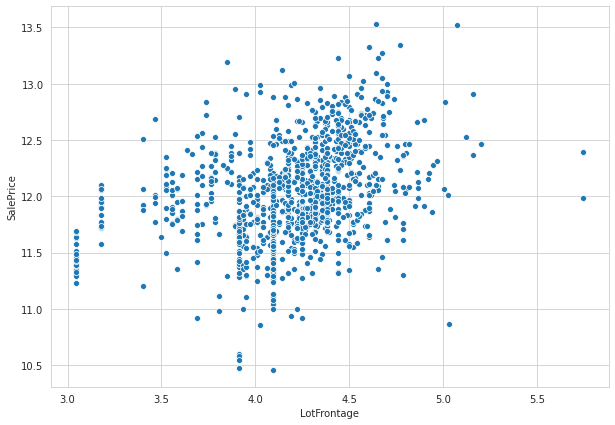

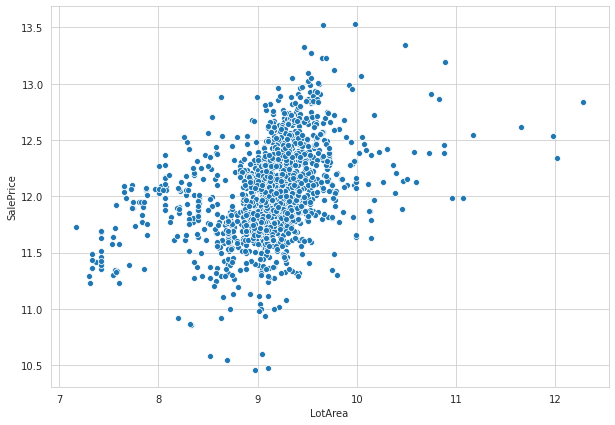

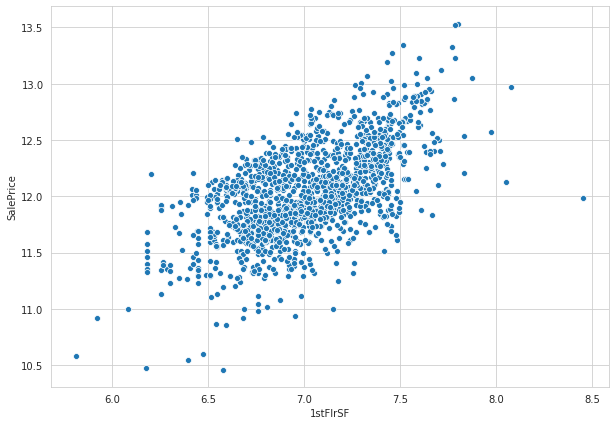

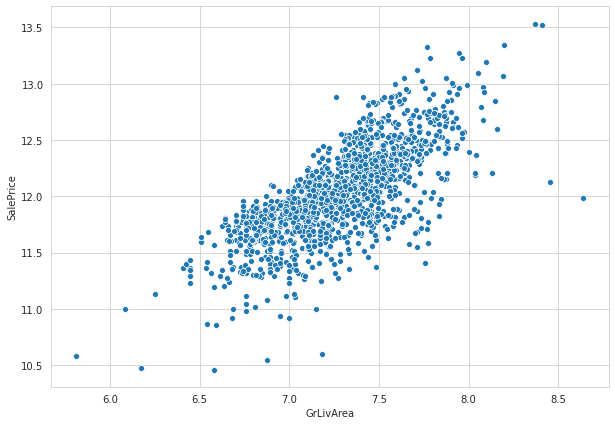

In [50]:
copy_data['SalePrice'] = np.log(copy_data['SalePrice'])
for column in continious_column:
    if 0 in copy_data[column].unique():
        pass
    else:
        plt.figure(figsize=(10, 7))
        copy_data[column] = np.log(copy_data[column])
        sns.scatterplot(x=copy_data[column], y=copy_data['SalePrice'], data=copy_data)
        
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

* npw its looks like something better. and shown have some relation with salePrice
* It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.
* Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

## 5.2 Bivariate analysis of Categorical Columns

**This plot list is little bit longer if u want to see those please click "Show" button****

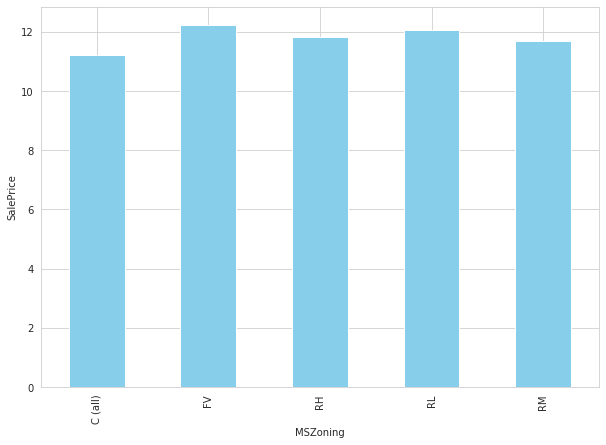

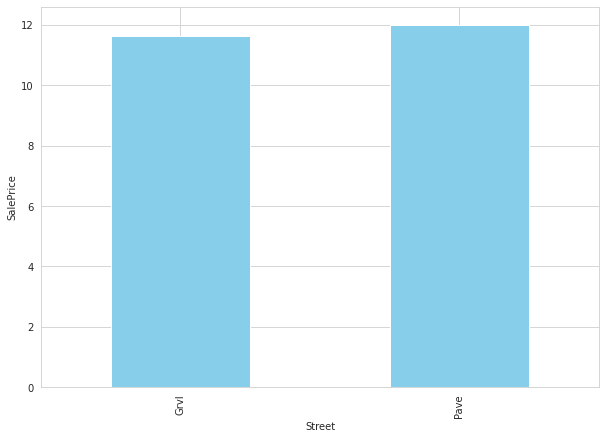

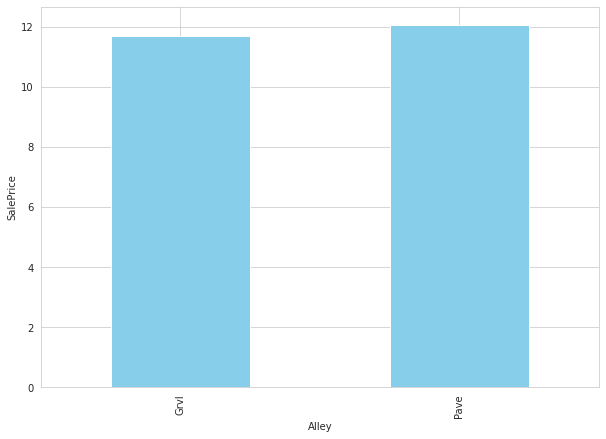

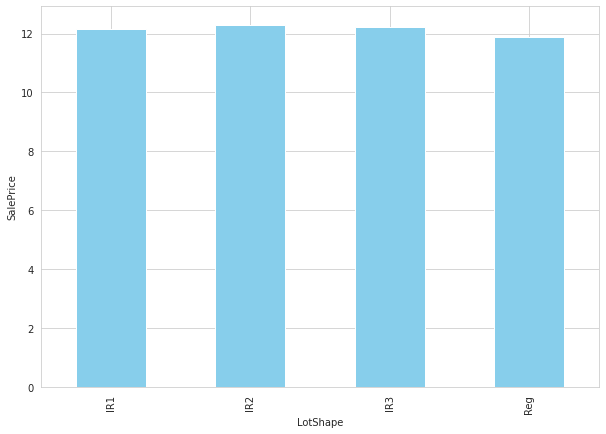

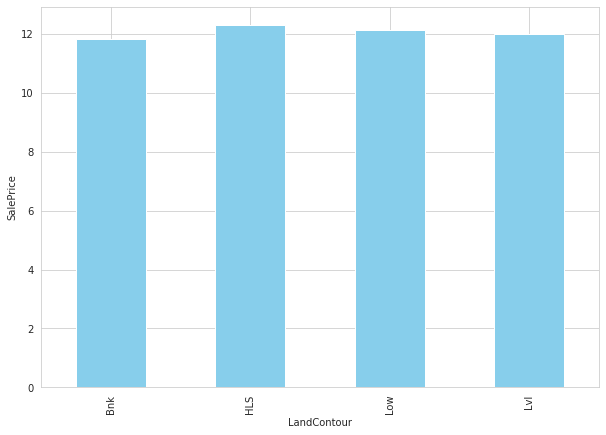

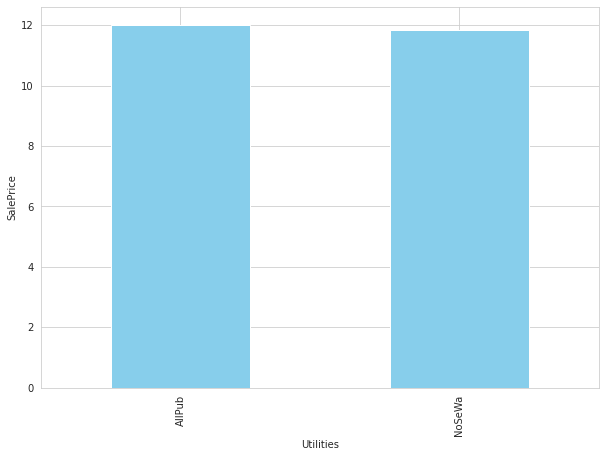

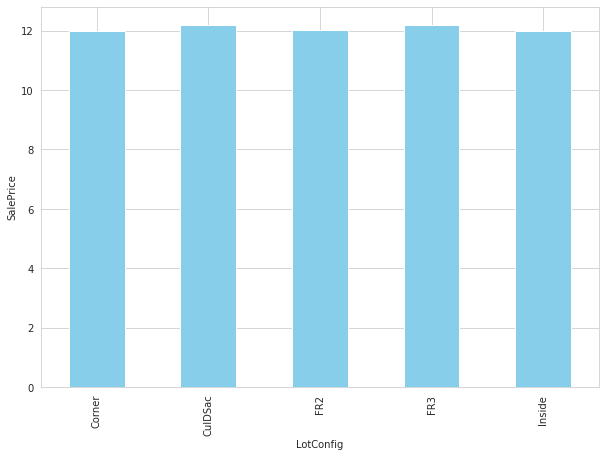

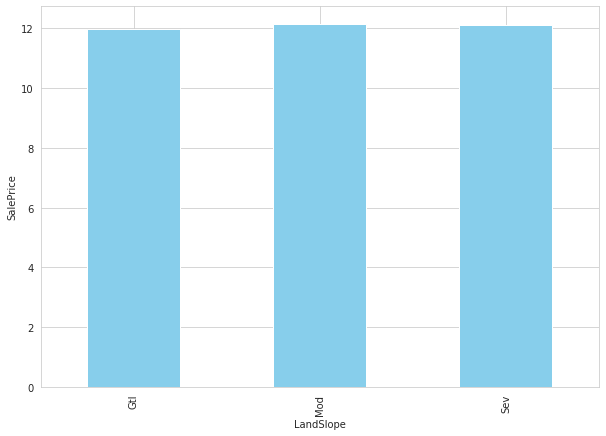

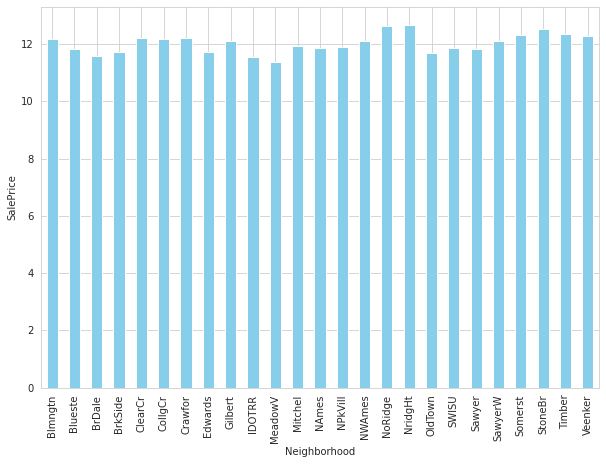

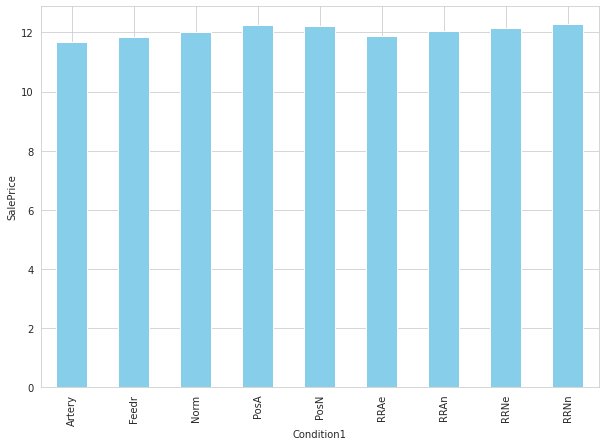

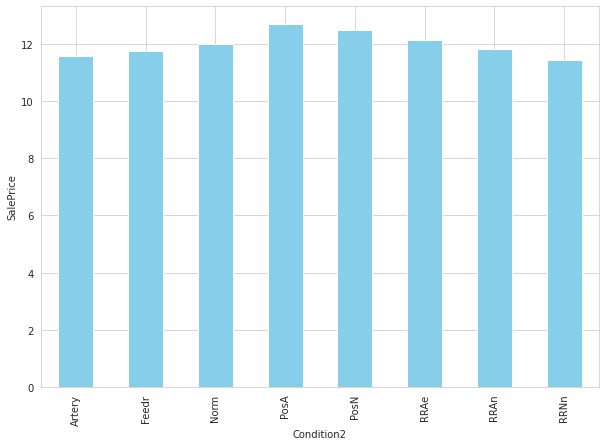

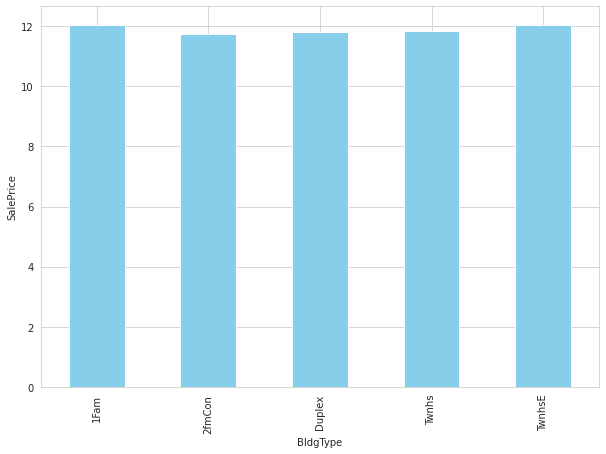

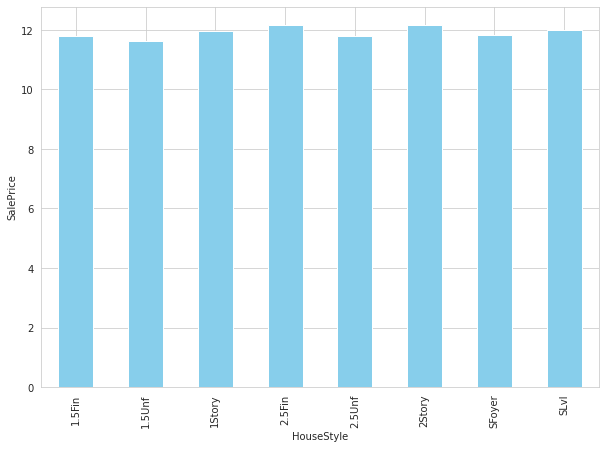

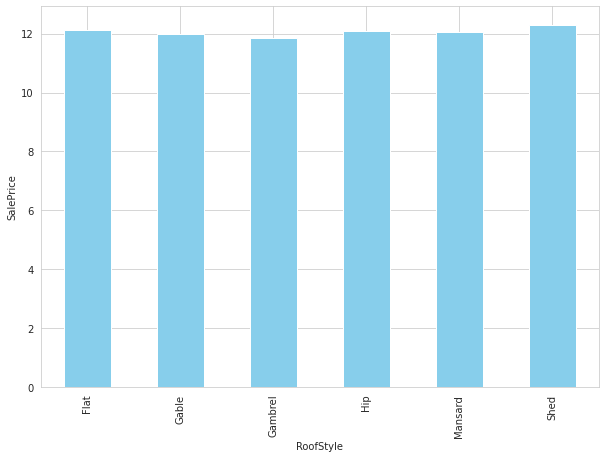

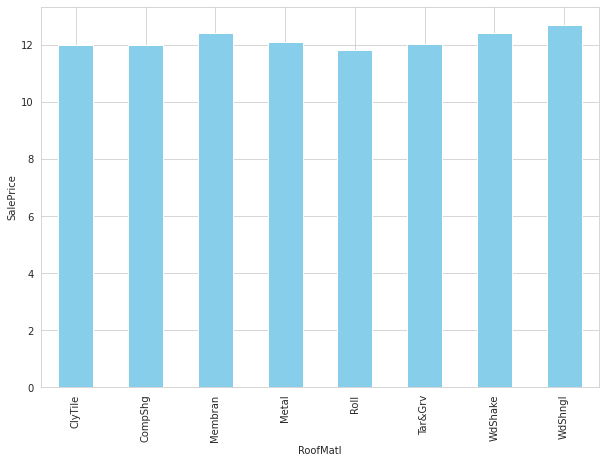

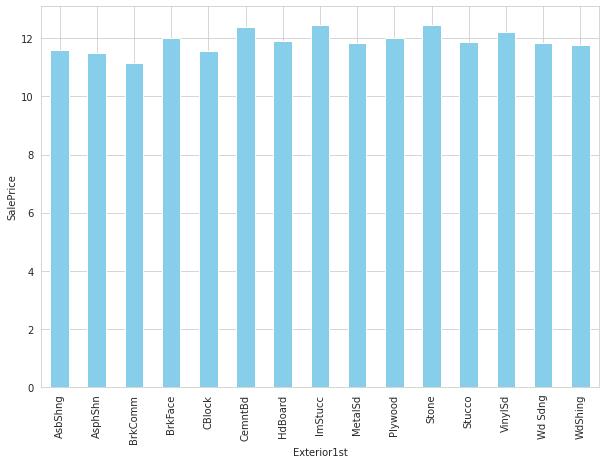

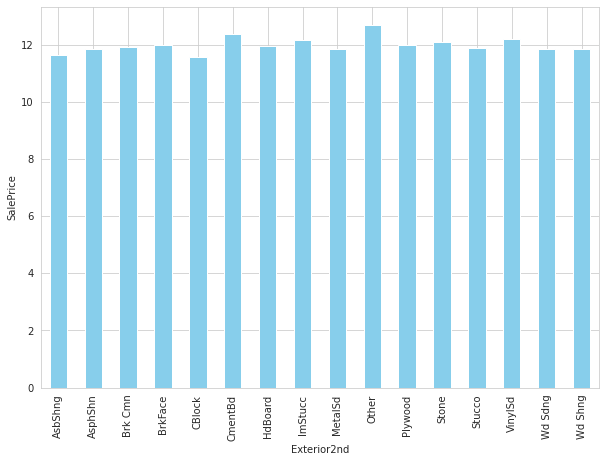

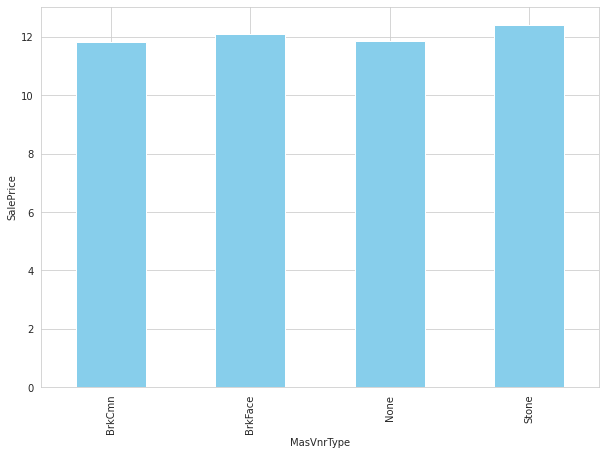

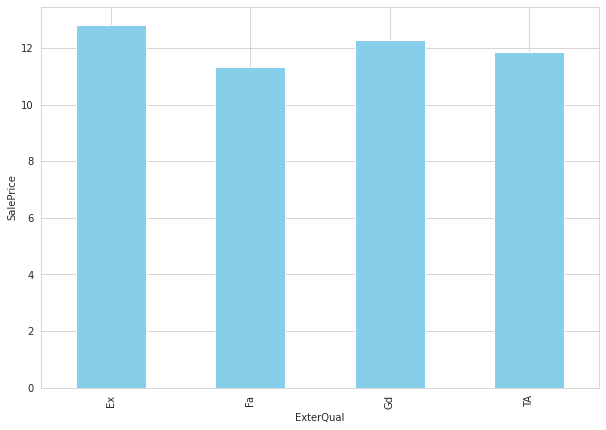

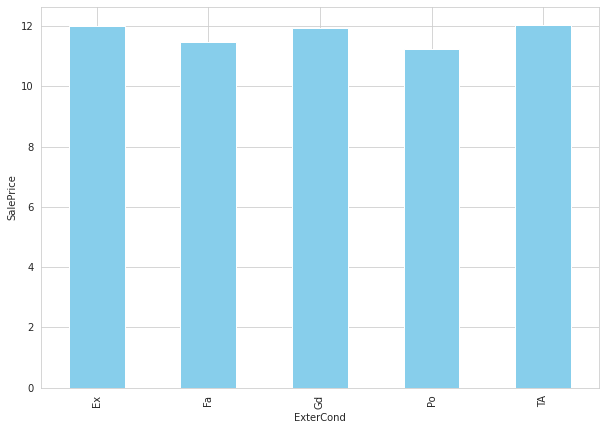

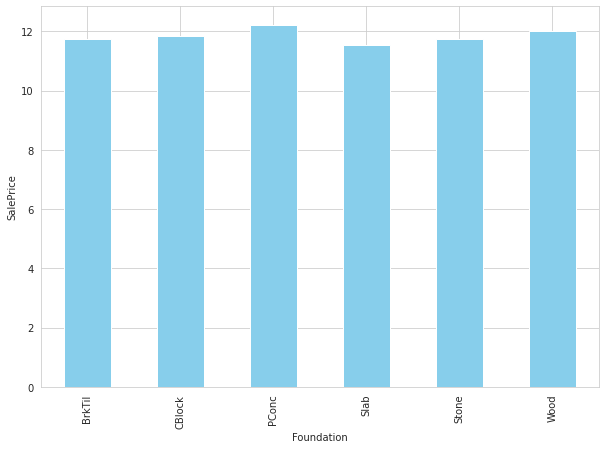

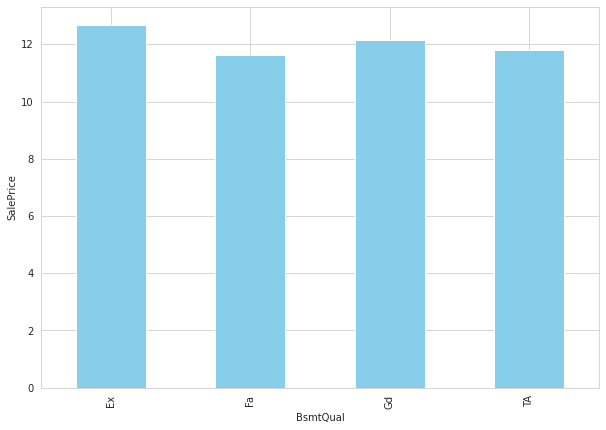

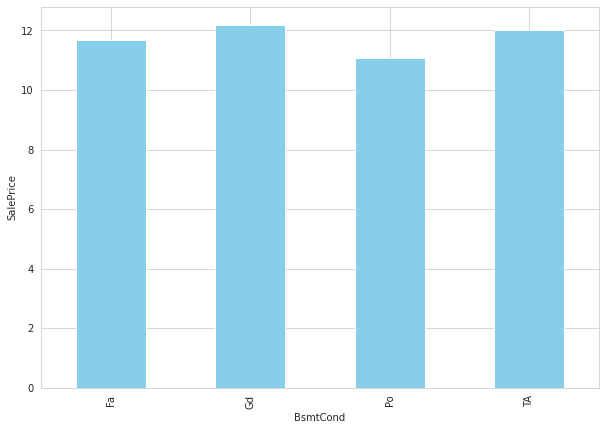

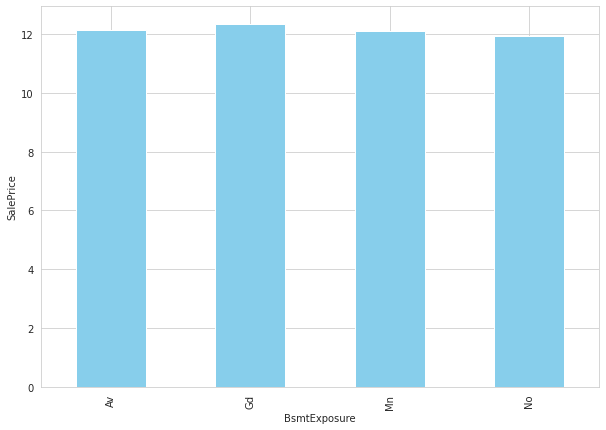

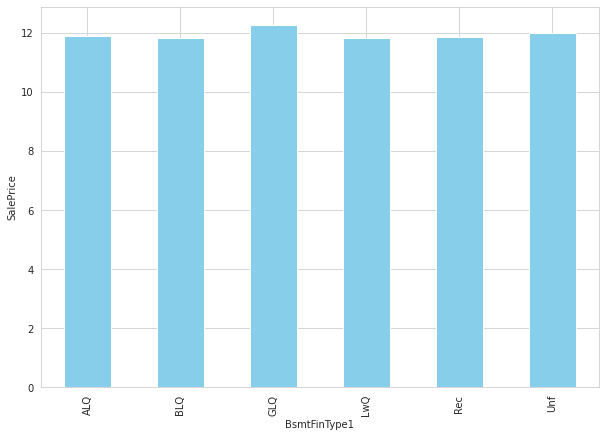

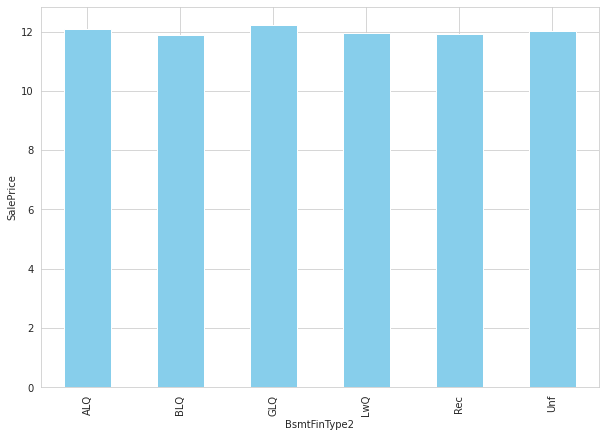

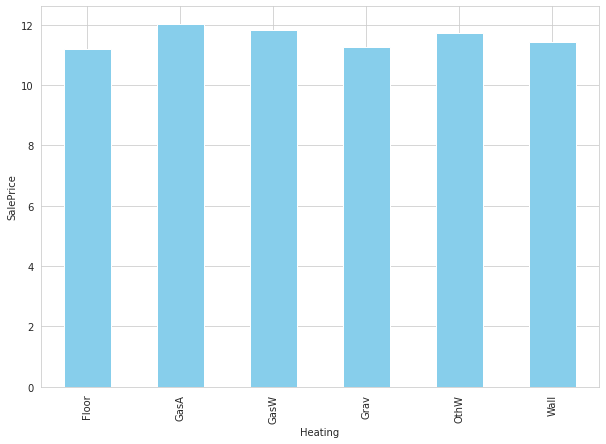

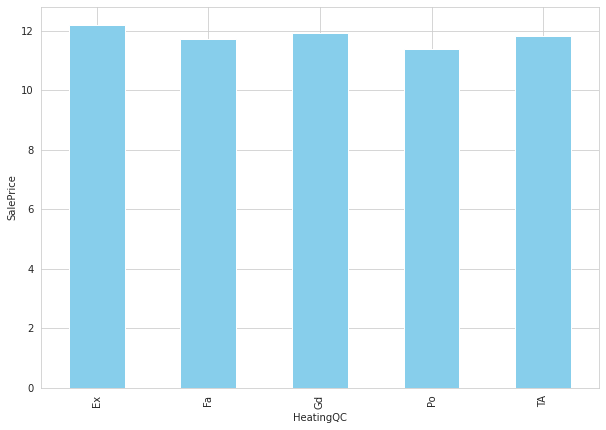

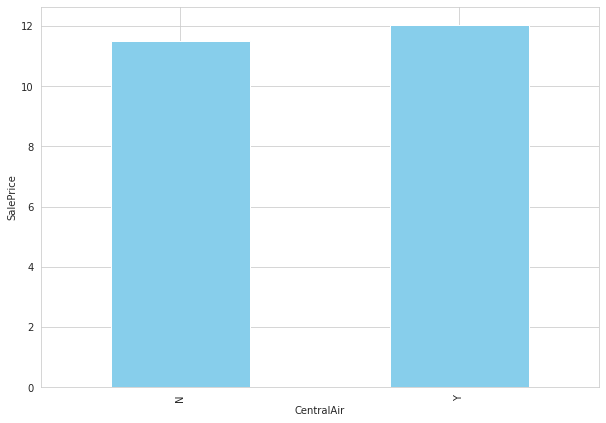

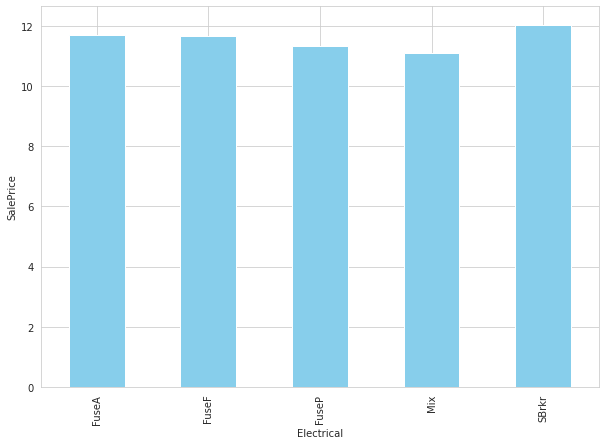

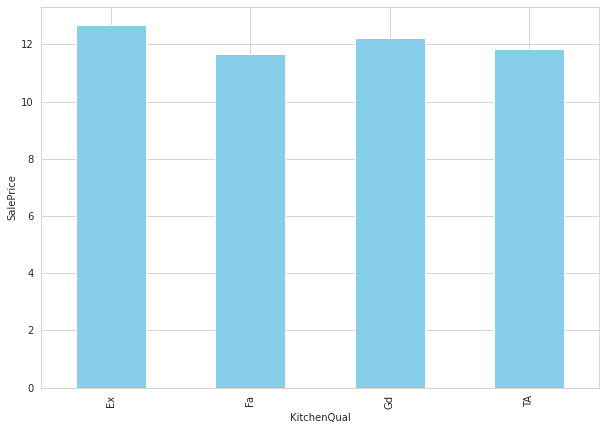

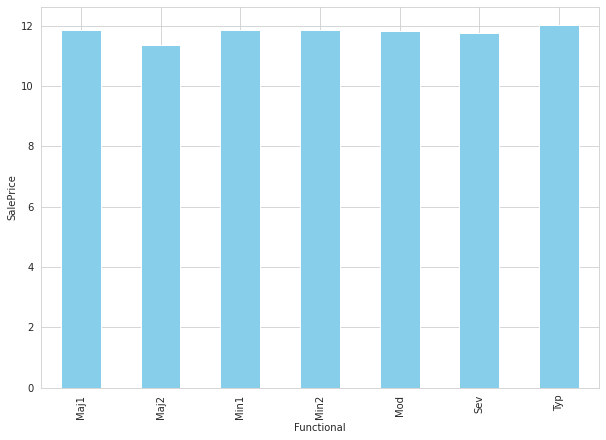

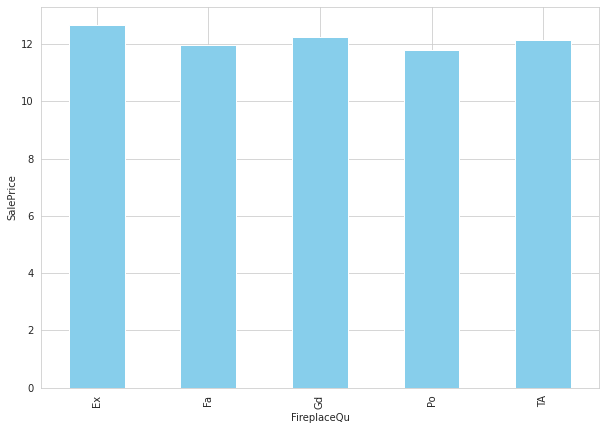

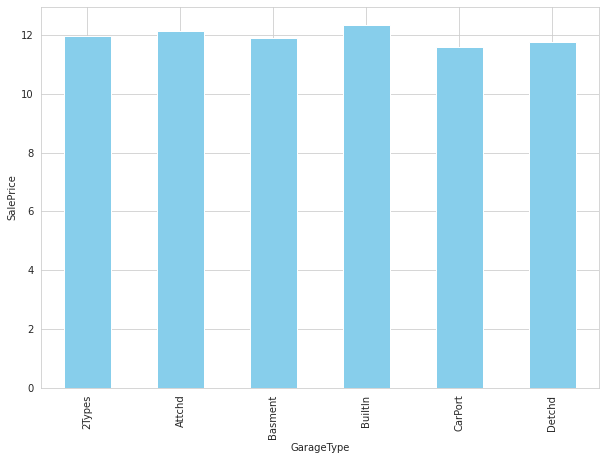

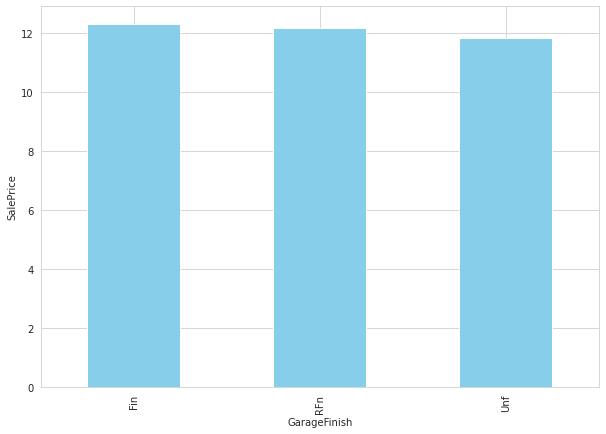

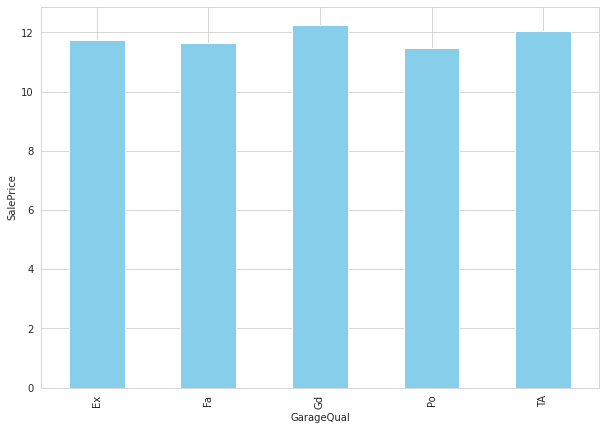

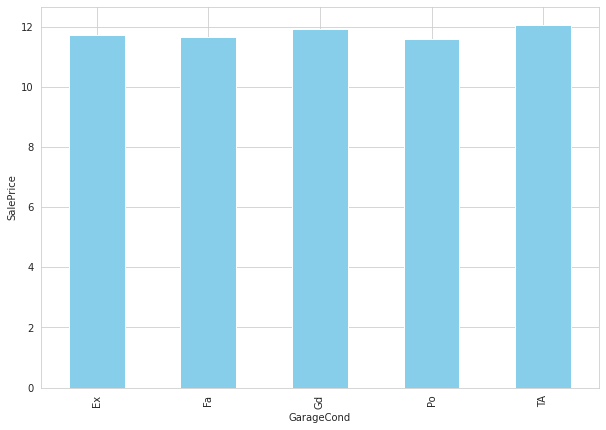

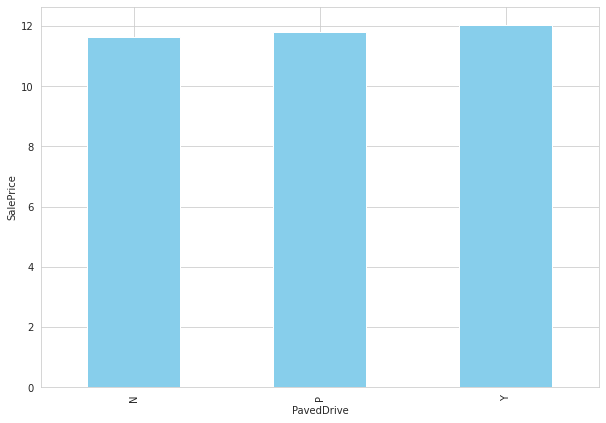

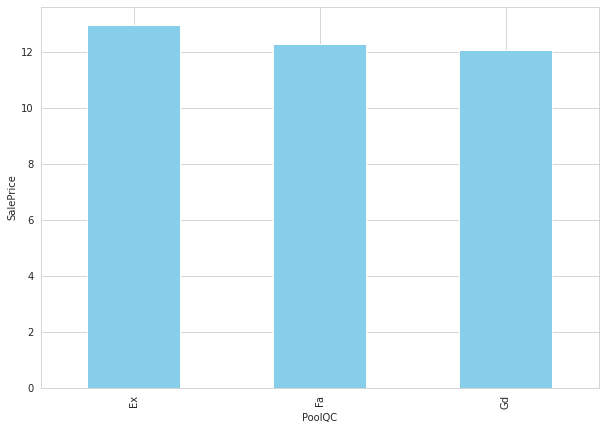

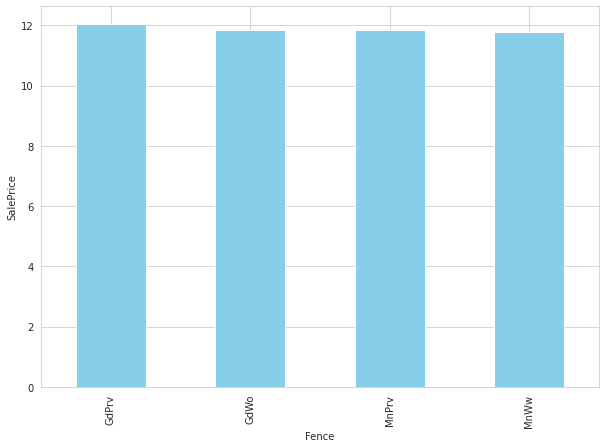

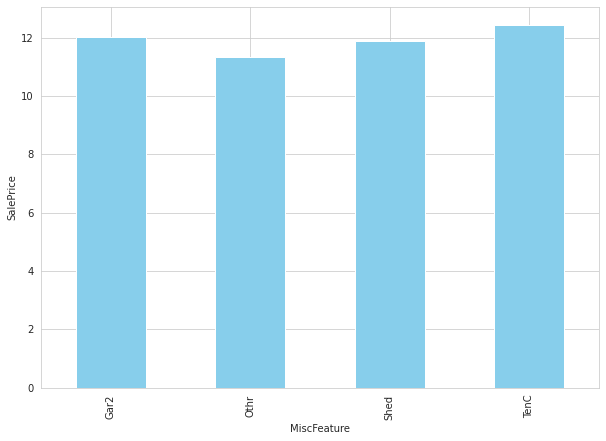

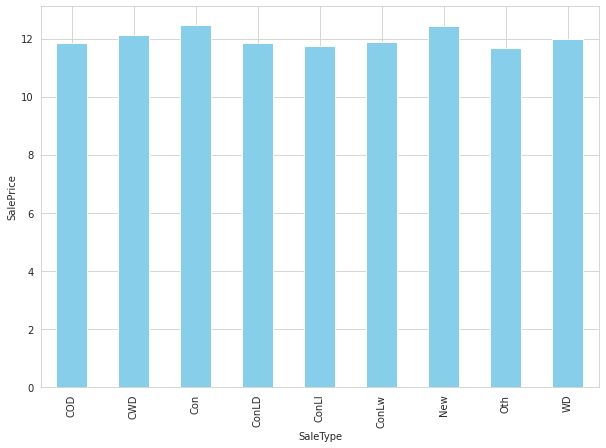

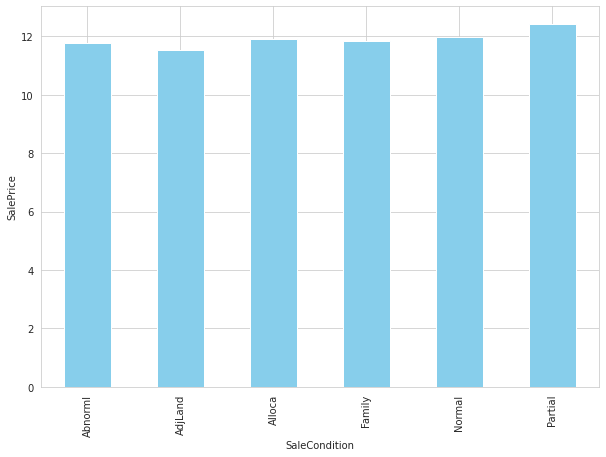

In [51]:
for column in categorical_columns:
    plt.figure(figsize=(10, 7))
    copy_data.groupby(by=column)['SalePrice'].median().plot.bar(color = "skyblue")
    
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

it's shown us that some are categorical features have some correlation with 'salePrice'. but most of them are not correlated with 'saleprice'.


'OverallQual' is a ordinal categorical type. we can use boxplot to plot it, to see correlation with 'SalePrice'

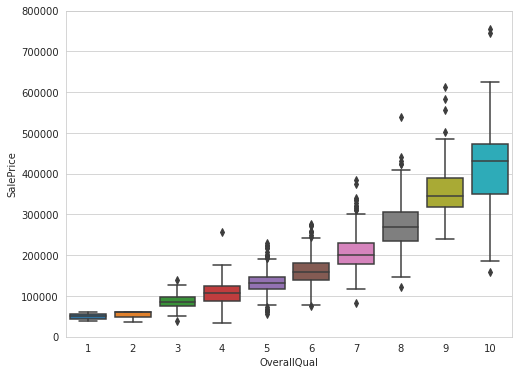

In [52]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# 6. Correlation coefficients

In [53]:
feature_corr = numerical_data.corr()
feature_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

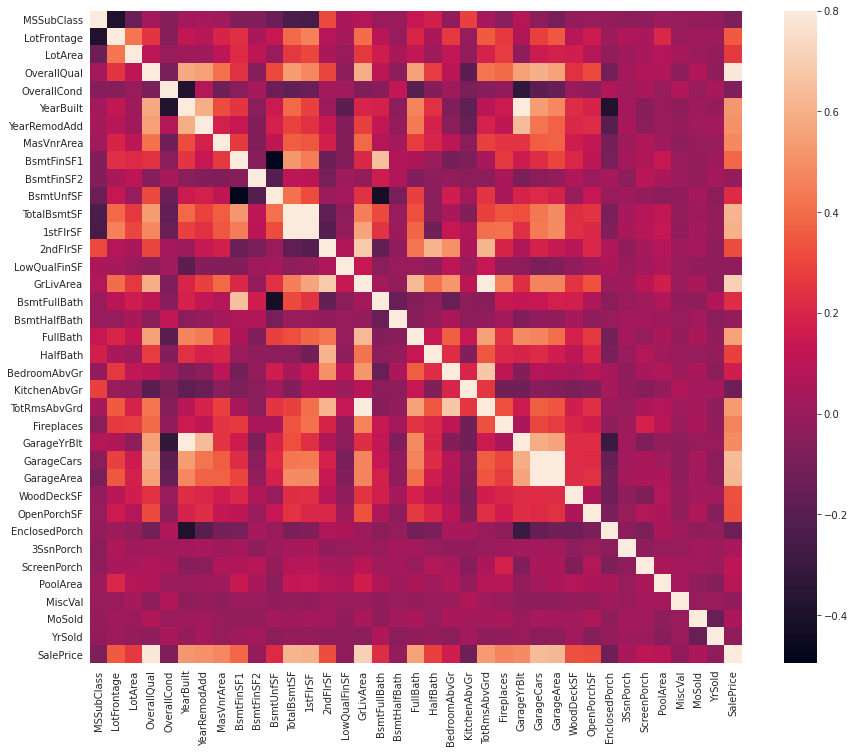

In [54]:
plt.figure(figsize=(15, 12))
sns.heatmap(feature_corr,square = True,  vmax=0.8)

heatmap is a good way to understand correlation. but actually here we see nothing. for that we can select first 11 strongly correlated columns to see heatmap correlation

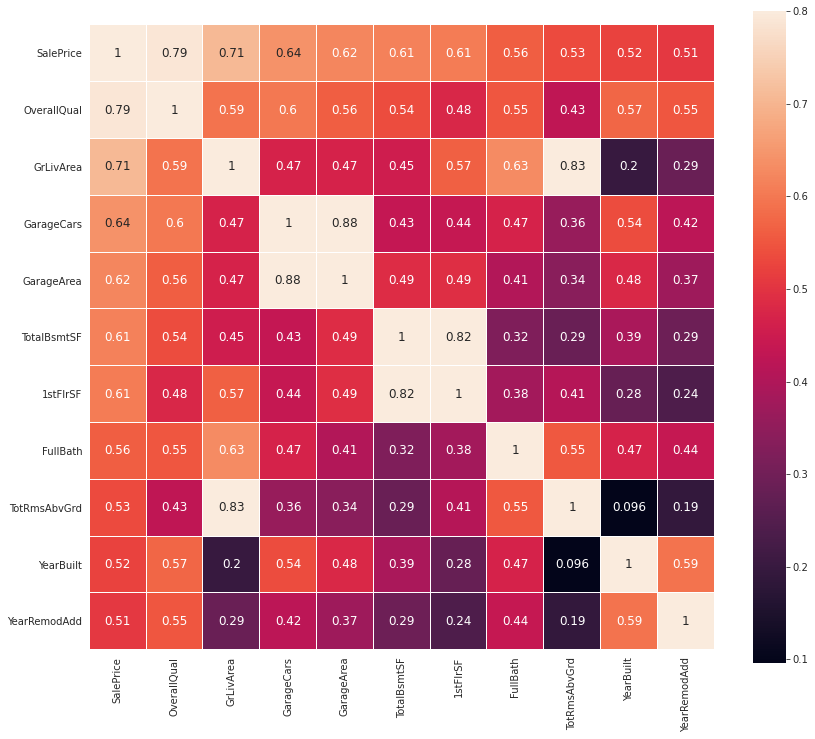

In [55]:
k = 11
cols = feature_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cols
cm = np.corrcoef(train_data[cols].values.T) # transformed data
cm
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True, linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)


* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
* its told us that '**OverallQual**', '**GrLivArea**' and '**TotalBsmtSF**' are strongly correlated with '**SalePrice**'.
* '**GarageCars**' and '**GarageArea**' are strongly correlated.
* '**TotRmsAdvGrd**' and '**GrLivArea**' are strongly correlated.
* '**istFlrSF**' and '**TotalBsmtSF**' are strongly correlated. 


we can shown them into pai plot also to see correlation

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


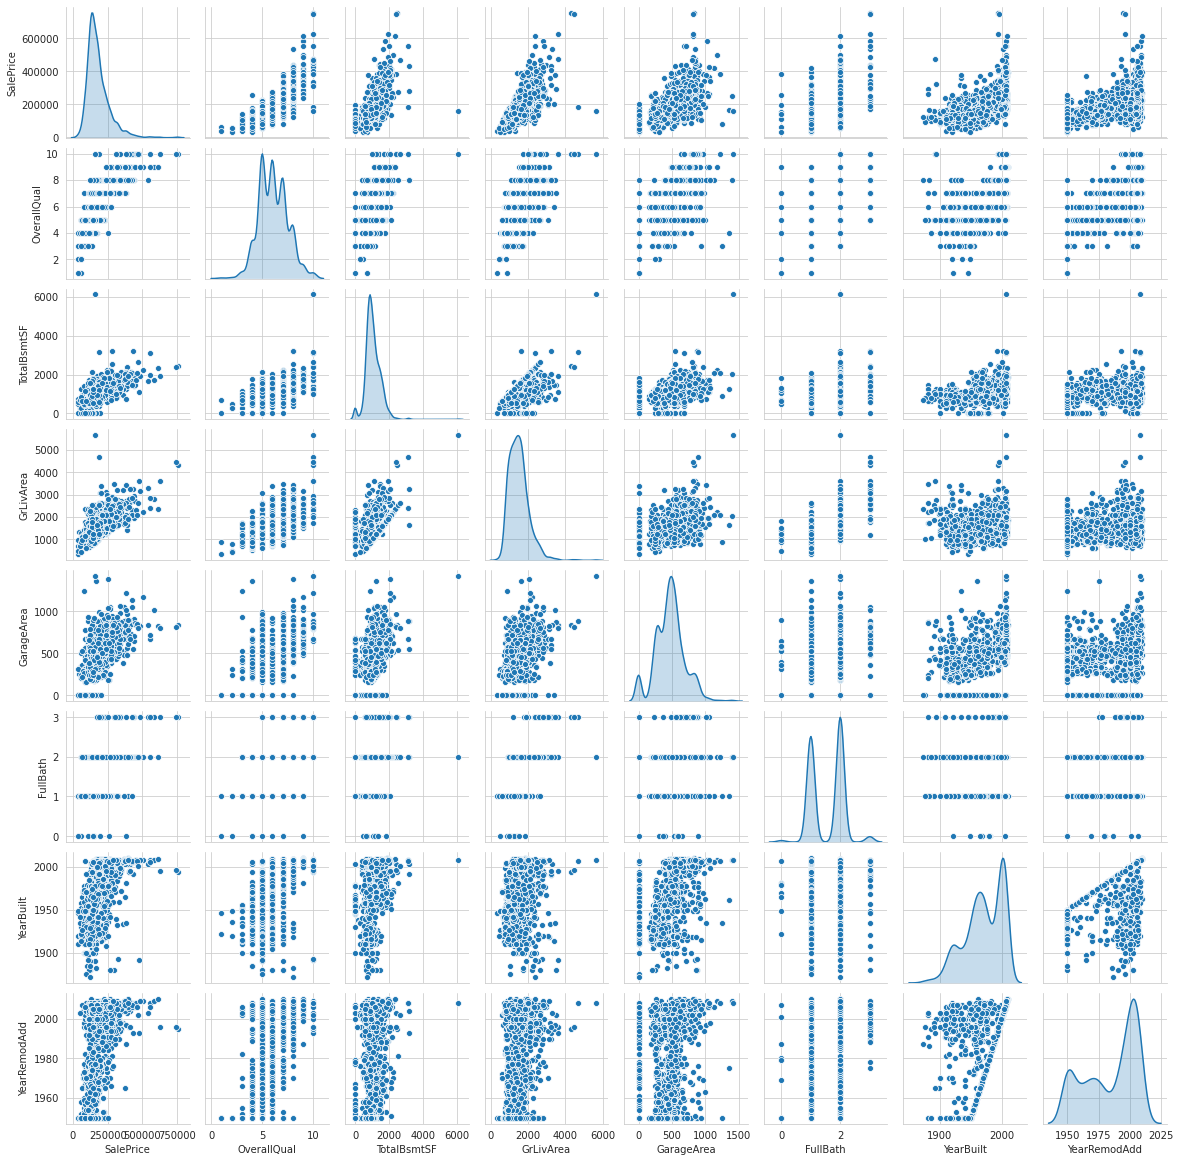

In [56]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# 7. Outliers

Outliers is one of the most important task in EDA. Outliers have much influence in model. Here we get more important insights about our features and also can find out which point of data are not following other observation. While doing the EDA a quick visual way to check for the outliers for continuous data is via scatterplots and boxplots.

In [57]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);
# saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] # specifies that you want to slice out a 1D vector of length 97 from a 2D array.
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.


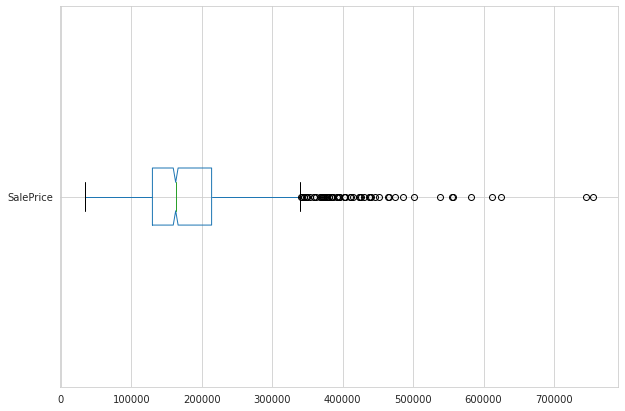

In [58]:
# copy_data[column] = np.log(copy_data[column])
plt.figure(figsize=(10, 7))
train_data.boxplot(column='SalePrice', notch=True, vert=False)

plt.show()

In [59]:
copy_data = train_data.copy()

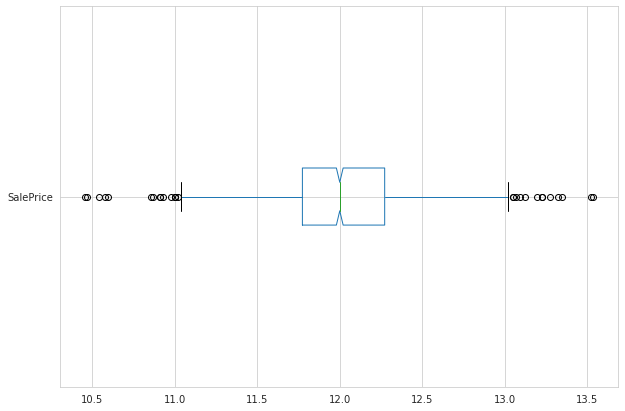

In [60]:
copy_data['SalePrice'] = np.log(copy_data['SalePrice'])
plt.figure(figsize=(10, 7))
copy_data.boxplot(column='SalePrice', notch=True, vert=False)

plt.show()

the value zero doesn't allow us to do log transformations.

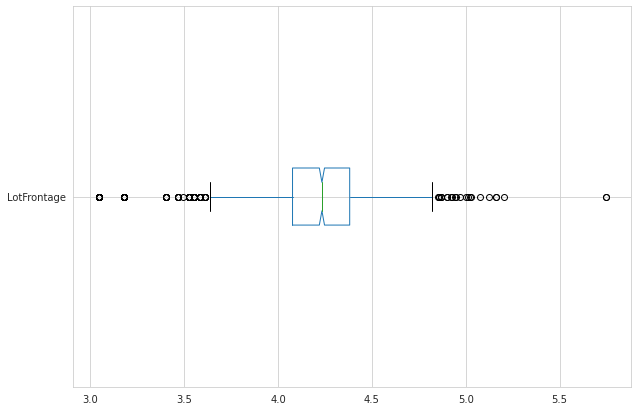

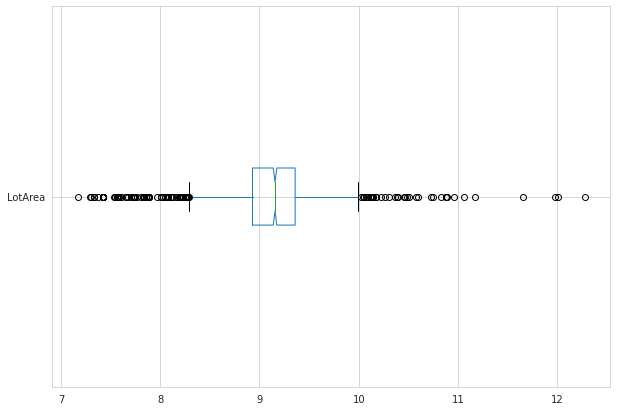

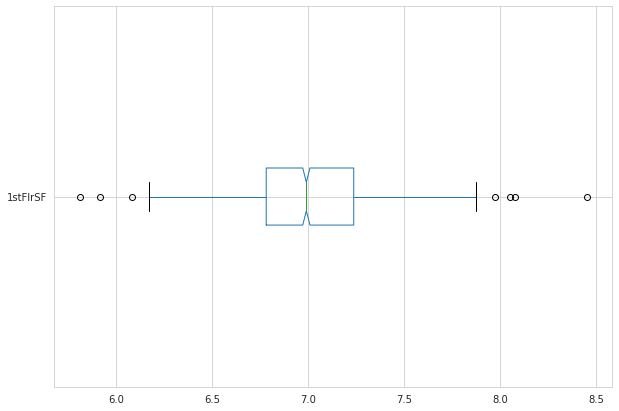

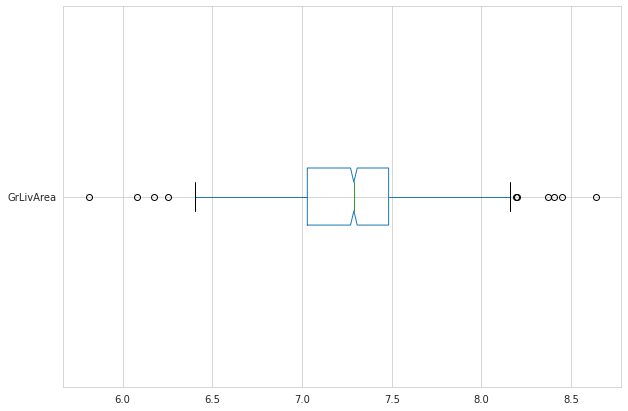

In [61]:
for column in continious_column:
    if 0 in copy_data[column].unique():
        pass
    else:
        plt.figure(figsize=(10, 7))
        copy_data[column] = np.log(copy_data[column])
        copy_data.boxplot(column=column , notch=True, vert=False)
        
        plt.show()

with the help of boxplot we can see lots of outliers on those columns. we will taken care of in feature engineering section

# 8. Central tendency and distribution of target columns

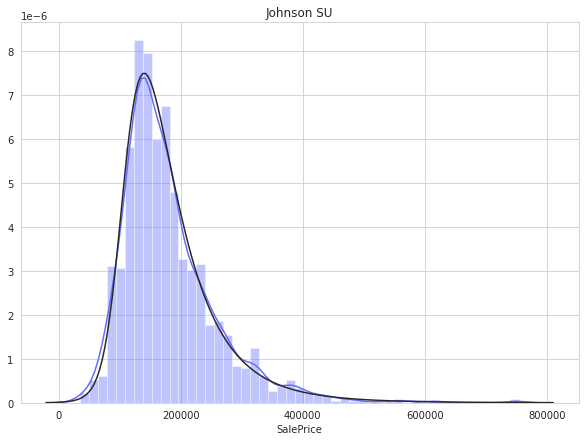

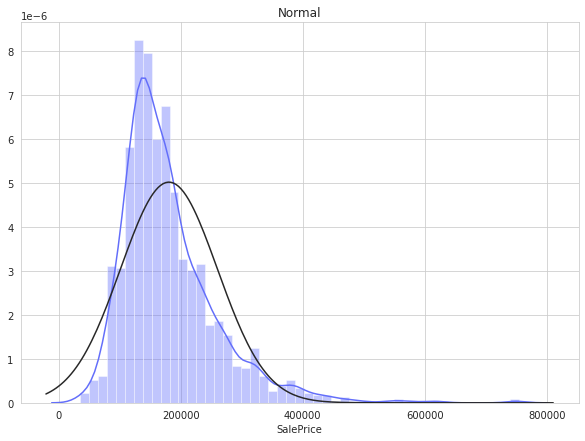

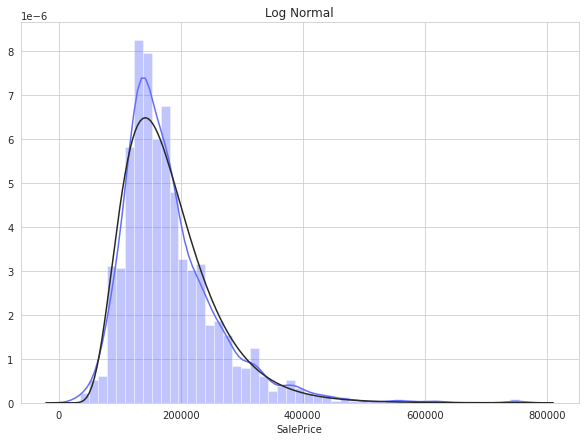

In [62]:
y = train_data['SalePrice']

plt.figure(figsize=(10, 7))
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.johnsonsu, color='#636efa')

plt.figure(figsize=(10, 7))
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm, color='#636efa')

plt.figure(figsize=(10, 7))
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=True, fit=st.lognorm, color='#636efa')

* In normal 
* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

**Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.**

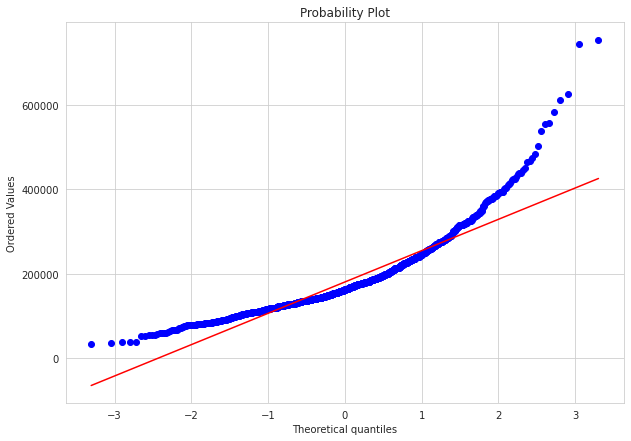

In [63]:
plt.figure(figsize=(10, 7))
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [64]:
copy_data = train_data.copy()

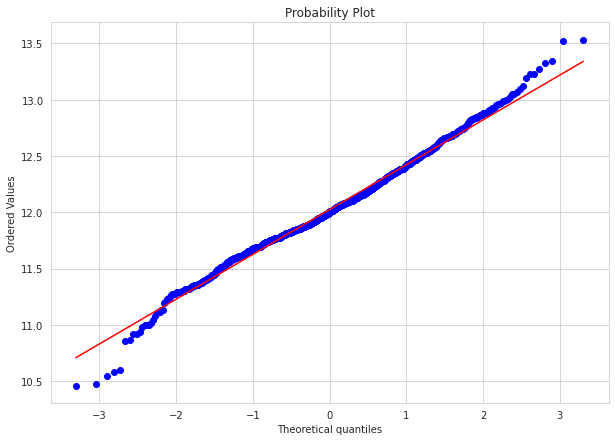

In [65]:
#applying log transformation
plt.figure(figsize=(10, 7))
copy_data['SalePrice'] = np.log(copy_data['SalePrice'])
res = stats.probplot(copy_data['SalePrice'], plot=plt)

In [66]:
print("Skewness:", train_data['SalePrice'].skew())
print('-' * 30)
print("Kurtosis:", train_data['SalePrice'].kurt())

Skewness: 1.8828757597682129
------------------------------
Kurtosis: 6.536281860064529


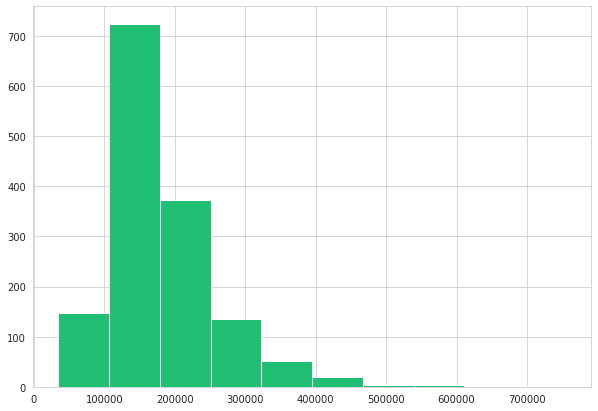

In [67]:
# plt.figure(figsize=(5, 3))
plt.figure(figsize=(10, 7))
plt.hist(train_data['SalePrice'],orientation = 'vertical',histtype = 'bar', color ='#21bf73')
plt.show()

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

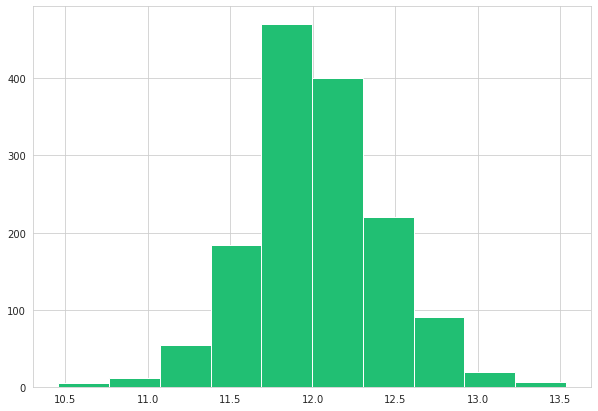

In [68]:
# plt.figure(figsize=(5, 3))
plt.figure(figsize=(10, 7))
target = np.log(train_data['SalePrice'])
target.skew()
plt.hist(target,color='#21bf73')

Its looks much better now, after log well distributed.

Conclusion:
That's all. I think we do some good exploratory data analysis here.

<h2>Note: If you think it's helpful please <i style="color: red;">upvoted</i>. And inspire me to do more. Thank you</h2>

<h3>Acknowledgement:</h3>
<ol>
    <li><a href="https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9">https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9</a></li>
    <li><a href="https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15">https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15</a></li>
    <li><a href="https://www.youtube.com/watch?v=FLuqwQgSBDw&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L">https://www.youtube.com/watch?v=FLuqwQgSBDw&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L</a></li>
    <li><a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python">https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python</a></li>
    <li><a href="https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis">https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis</a></li>
    <li><a href="https://www.youtube.com/watch?v=ioN1jcWxbv8&list=PLZoTAELRMXVMcRQwR5_J8k9S7cffVFq_U">https://www.youtube.com/watch?v=ioN1jcWxbv8&list=PLZoTAELRMXVMcRQwR5_J8k9S7cffVFq_U</a></li>
</ol>